# 03_eda_data.ipynb

## Overview
This notebook performs **deep exploratory data analysis (EDA)** on all processed datasets:
- **Core datasets:** `etimad_tenders_clean.csv`, `future_projects_clean.csv`
- **Lookup datasets:** `government_entity_clean.csv`, `primary_activity_clean.csv`, `secondary_activity_clean.csv`, `regions_clean.csv`, `tender_doc_price_range_clean.csv`, `tender_publication_date_clean.csv`, `tender_statuses_clean.csv`, `tender_types_clean.csv`

Goals:
- Understand distributions of numerical and categorical columns
- Explore missing values and data quality
- Discover patterns, trends, and relationships
- Generate insights for downstream tasks (SQL agent queries, dashboards, etc.)


# 1. Setup & Imports

### Context
We import the necessary libraries and set display options to **see all columns** and produce **clean visualizations**.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# 2. Load Datasets

### Context
We load all **processed datasets** to explore them.  
This ensures we work on **cleaned, standardized data**.

In [5]:
# Core datasets
df_tenders = pd.read_csv(r"C:\Users\Rubah\Downloads\Final_Project\Data\processed\core\nabahan_full_details_clean.csv")
df_future = pd.read_csv(r"C:\Users\Rubah\Downloads\Final_Project\Data\processed\core\future_projects_clean.csv")

# Lookup datasets
df_ge = pd.read_csv(r"C:\Users\Rubah\Downloads\Final_Project\Data\processed\lookup\government_entity_clean.csv")
df_pa = pd.read_csv(r"C:\Users\Rubah\Downloads\Final_Project\Data\processed\lookup\primary_activity_clean.csv")
df_sa = pd.read_csv(r"C:\Users\Rubah\Downloads\Final_Project\Data\processed\lookup\secondary_activity_clean.csv")
df_r = pd.read_csv(r"C:\Users\Rubah\Downloads\Final_Project\Data\processed\lookup\regions_clean.csv")
df_tdpr = pd.read_csv(r"C:\Users\Rubah\Downloads\Final_Project\Data\processed\lookup\tender_doc_price_range_clean.csv")
df_tpd = pd.read_csv(r"C:\Users\Rubah\Downloads\Final_Project\Data\processed\lookup\tender_publication_date_clean.csv")
df_ts = pd.read_csv(r"C:\Users\Rubah\Downloads\Final_Project\Data\processed\lookup\tender_statuses_clean.csv")
df_tt = pd.read_csv(r"C:\Users\Rubah\Downloads\Final_Project\Data\processed\lookup\tender_types_clean.csv")


# 3. Core Dataset EDA

### 3.1 Basic Info & Missing Values

**Context:**  
We check **data types, non-null counts, and basic statistics**.  
Heatmap highlights **missing values** visually to understand potential data quality issues.


In [6]:
df_tenders.info()
df_tenders.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2414 entries, 0 to 2413
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         2414 non-null   object 
 1   tender_name                 2413 non-null   object 
 2   tender_number               2413 non-null   object 
 3   reference_number            2413 non-null   float64
 4   tender_purpose              2413 non-null   object 
 5   tender_document_value       2413 non-null   float64
 6   tender_status               2413 non-null   object 
 7   contract_duration           2413 non-null   object 
 8   insurance_required          2413 non-null   object 
 9   tender_type                 2413 non-null   object 
 10  government_entity           2413 non-null   object 
 11  time_remaining              2410 non-null   object 
 12  submission_method           2410 non-null   object 
 13  initial_guarantee_required  0 non

,url,tender_name,tender_number,reference_number,tender_purpose,tender_document_value,tender_status,contract_duration,insurance_required,tender_type,government_entity,time_remaining,submission_method,initial_guarantee_required,final_guarantee,inquiry_deadline,submission_deadline,opening_date,evaluation_date,suspension_period,expected_award_date,work_start_date,question_start_date,max_answer_days,opening_location,classification_field,execution_location,details,competition_activity,includes_supply_items,maintenance_works,initial_guarantee_address,construction_works,package,agreement_type,agreement_duration,inquiry_days,submission_days,suppliers_applied,suppliers_awarded,countries,source_file,ingestion_date
count,2414,2413,2413,2.413000e+03,2413,2413.000000,2413,2413,2413,2413,2413,2410,2410,0.0,842,0.0,0.0,0.0,0.0,858.000000,0.0,0.0,0.0,2389.000000,2389,2356,2358,318,2358,2358,87,746,71,43,26,26,3.000000,3.000000,115,115,4,2414,2414
unique,2414,2363,2097,NaN,1802,NaN,20,85,2,5,252,841,2,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242,7,204,287,185,2,18,330,30,32,2,8,NaN,NaN,115,115,4,1,1
top,https://tenders.etimad.sa/Tender/DetailsForVis...,تأمين قطع غيار واصلاح اليات الدفاع المدني بمنط...,لا يوجد,NaN,توريد الأدوية والمواد والمستلز...عرض المزيد......,NaN,معتمدة,1 سنة,False,شراء مباشر,الشؤون الصحیة بوزارة الحرس الوطني,إنتهى,ملف واحد للعرض الفني والمالي معا,NaN,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,لا يوجد,غير مطلوب,داخل المملكةمنطقة الرياضالرياض,قوة شروره - محافظة شرورة - منطقة نجران,الأنشطة الطبية,لا,صيانة المباني,منصة اعتماد,المبـــاني,2,مغلقة,3 سنوات 0 الشهر 0 أيام,NaN,NaN,[شركة عبدالرحمن القصيبي للتجارة العامه - 7800....,[شركة عبدالرحمن القصيبي للتجارة العامه - 7800....,QA:قطر,nabahan_full_details.csv,2026-01-31
freq,1,11,167,NaN,108,NaN,1330,613,2363,1545,694,1483,2122,NaN,837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1531,2111,558,8,562,2311,30,81,29,10,20,9,NaN,NaN,1,1,1,2414,2414
mean,NaN,NaN,NaN,2.569591e+11,NaN,542.871944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.094406,NaN,NaN,NaN,4.785266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.333333,45.000000,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,4.283712e+09,NaN,811.504499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.661804,NaN,NaN,NaN,3.982207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.664414,25.980762,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2.406390e+11,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,15.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.512390e+11,NaN,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,37.500000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2.601390e+11,NaN,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,60.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2.601390e+11,NaN,700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.500000,60.000000,NaN,NaN,NaN,NaN,NaN


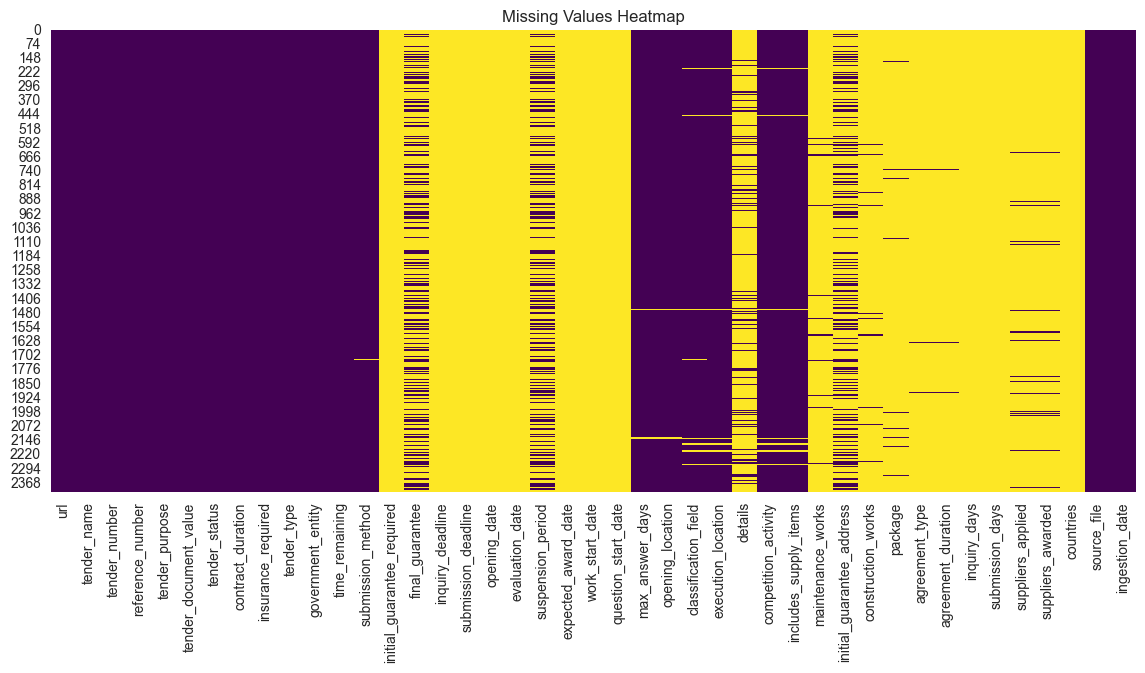

In [7]:
plt.figure(figsize=(14,6))
sns.heatmap(df_tenders.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### 3.2 Numerical Columns Analysis

**Context:**  
We explore **numerical columns** like budget, contract duration, and number of bidders.  
Histograms and KDE plots show **distribution shapes, outliers, and patterns**.


In [8]:
num_cols = df_tenders.select_dtypes(include=['float64','int64']).columns.tolist()
df_tenders[num_cols].describe()

,reference_number,tender_document_value,initial_guarantee_required,inquiry_deadline,submission_deadline,opening_date,evaluation_date,suspension_period,expected_award_date,work_start_date,question_start_date,max_answer_days,inquiry_days,submission_days
count,2.413000e+03,2413.000000,0.0,0.0,0.0,0.0,0.0,858.000000,0.0,0.0,0.0,2389.000000,3.000000,3.000000
mean,2.569591e+11,542.871944,NaN,NaN,NaN,NaN,NaN,5.094406,NaN,NaN,NaN,4.785266,38.333333,45.000000
std,4.283712e+09,811.504499,NaN,NaN,NaN,NaN,NaN,0.661804,NaN,NaN,NaN,3.982207,24.664414,25.980762
min,2.406390e+11,0.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,1.000000,10.000000,15.000000
25%,2.512390e+11,200.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,2.000000,30.000000,37.500000
50%,2.601390e+11,200.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,5.000000,50.000000,60.000000
75%,2.601390e+11,700.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,5.000000,52.500000,60.000000
max,2.601390e+11,12500.000000,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,110.000000,55.000000,60.000000


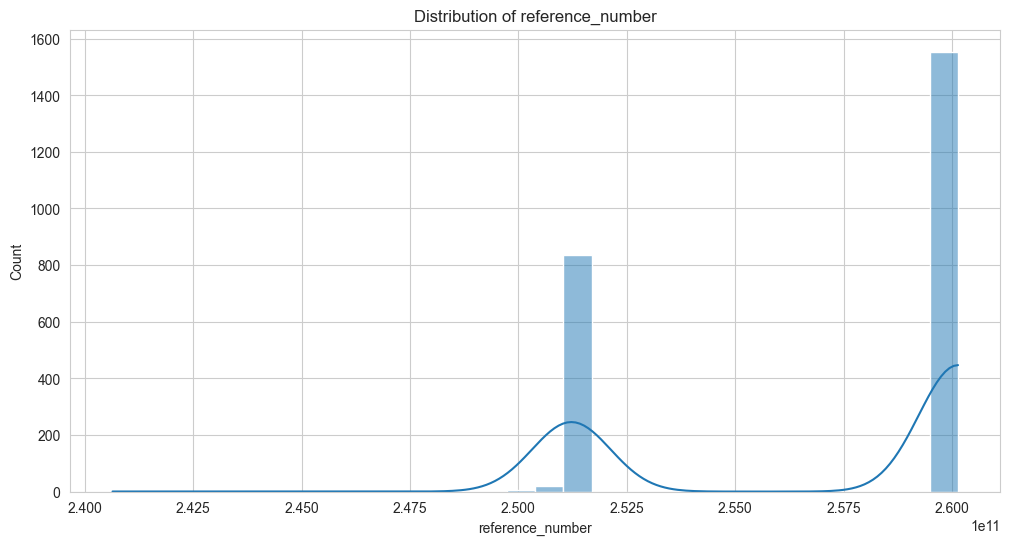

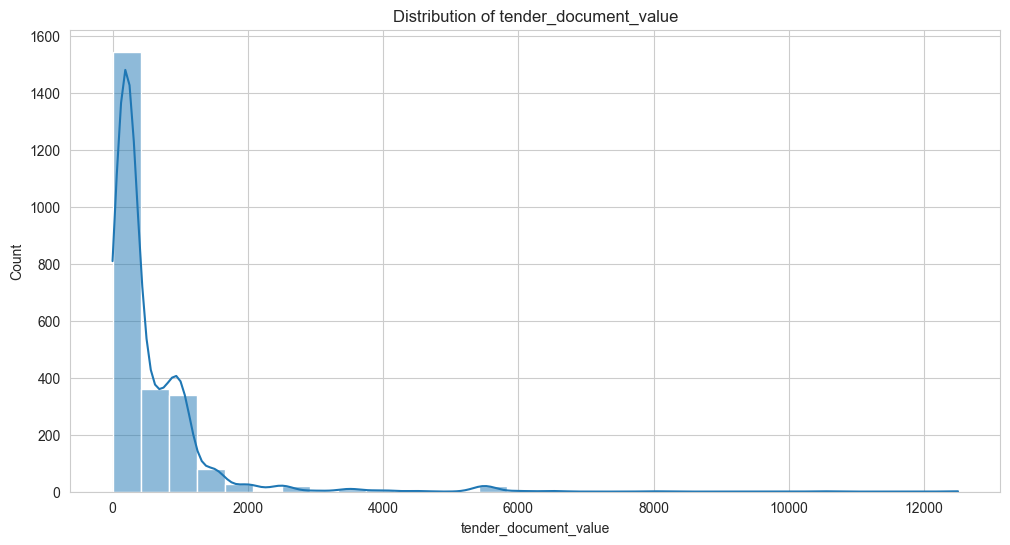

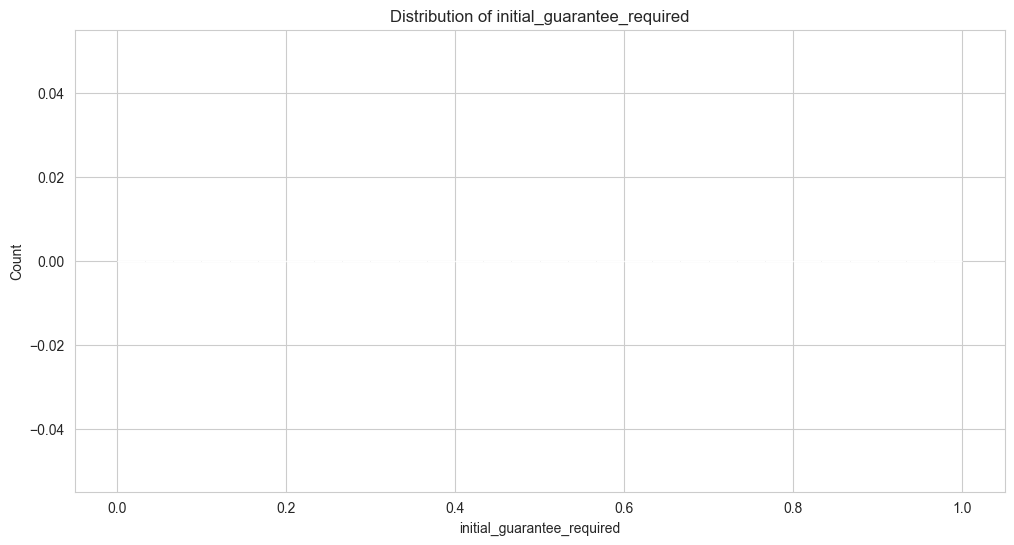

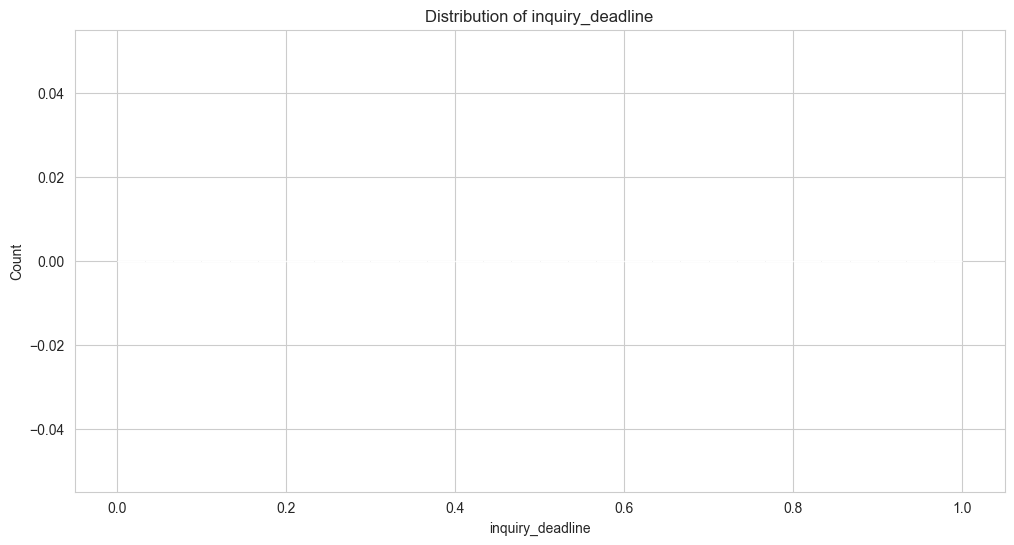

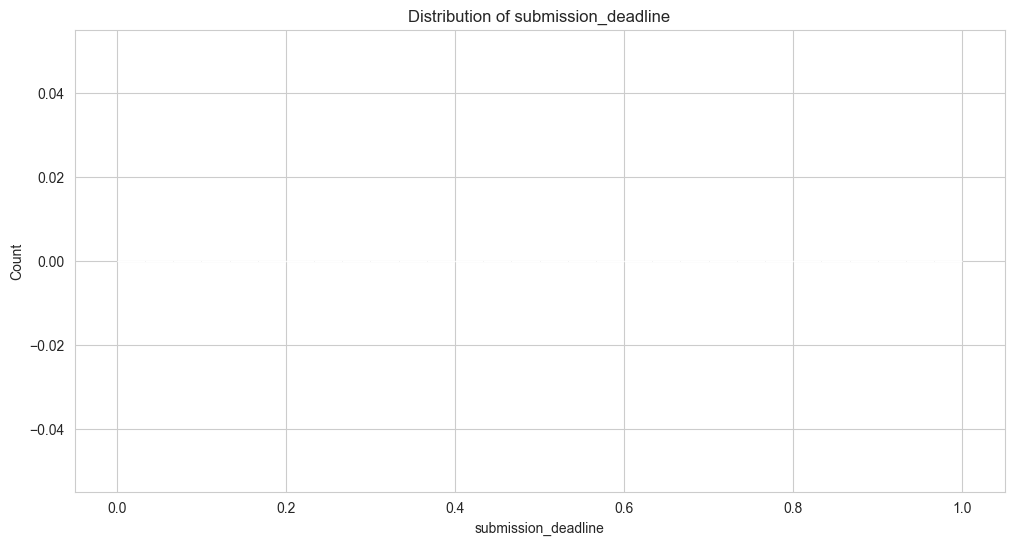

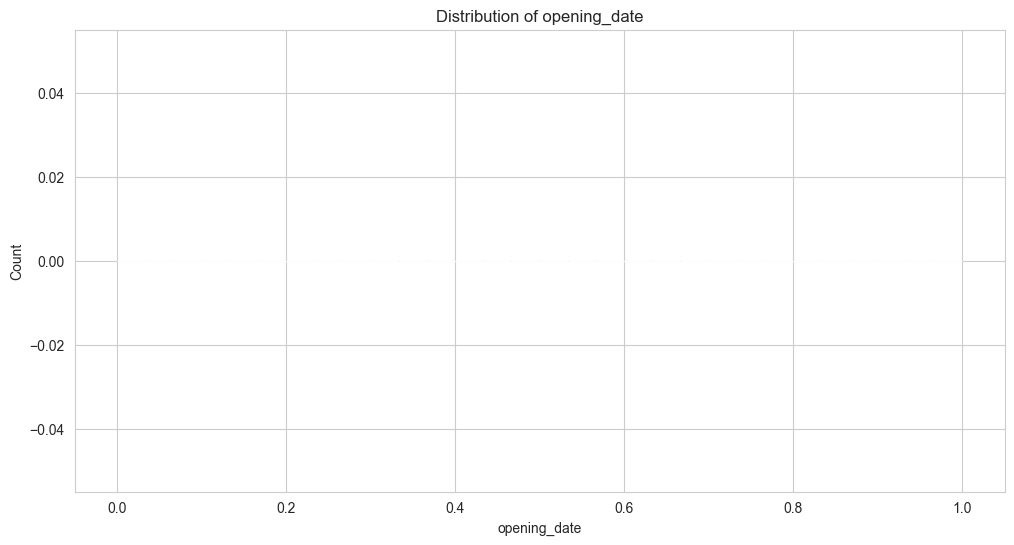

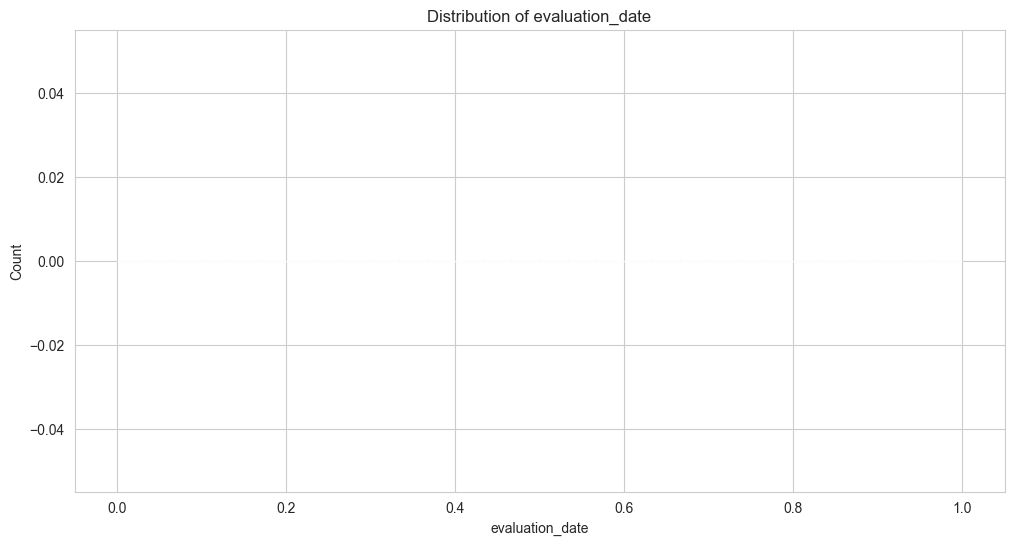

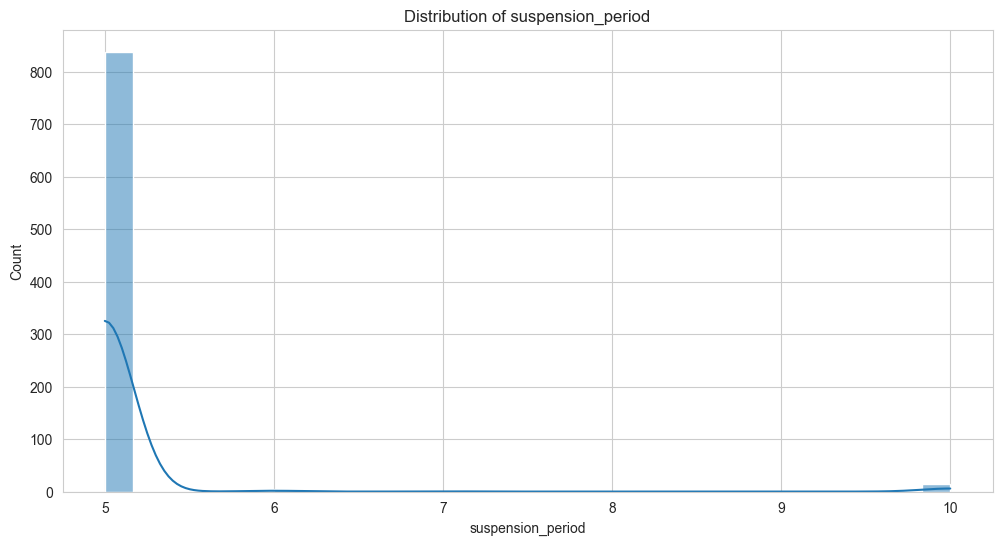

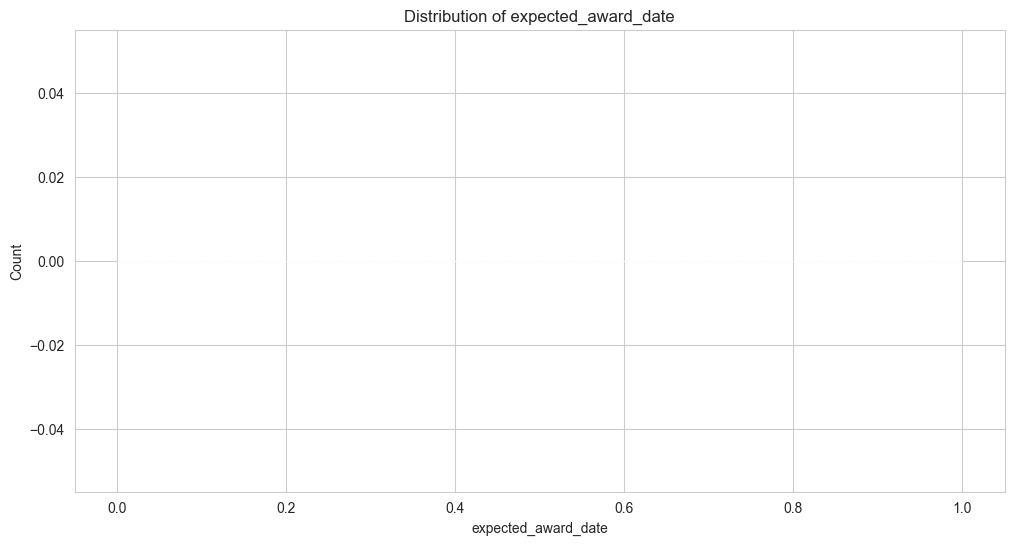

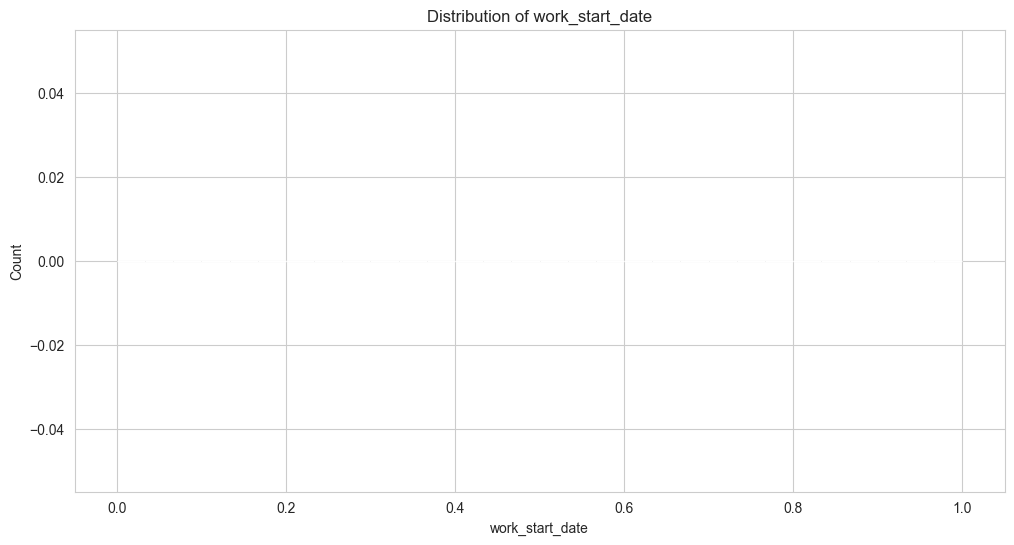

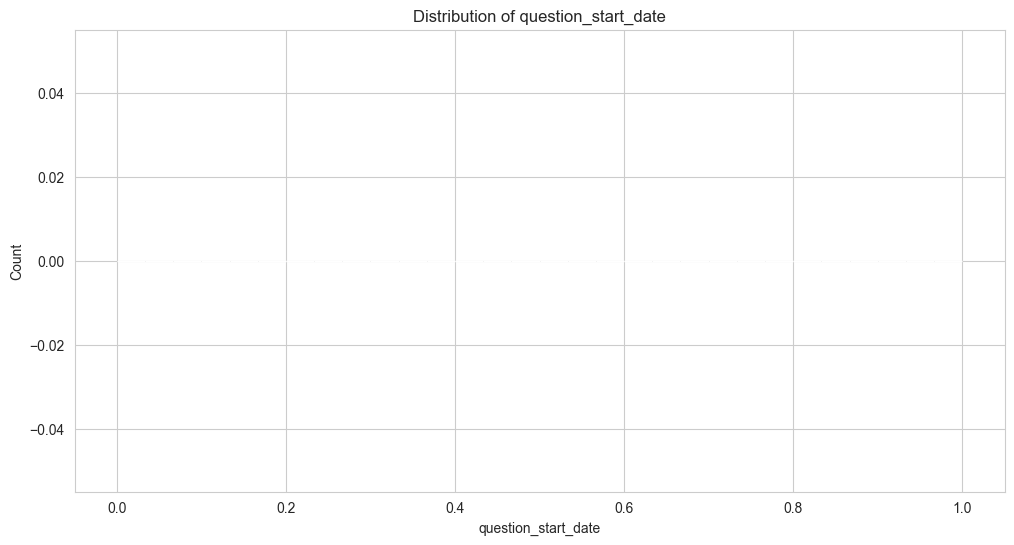

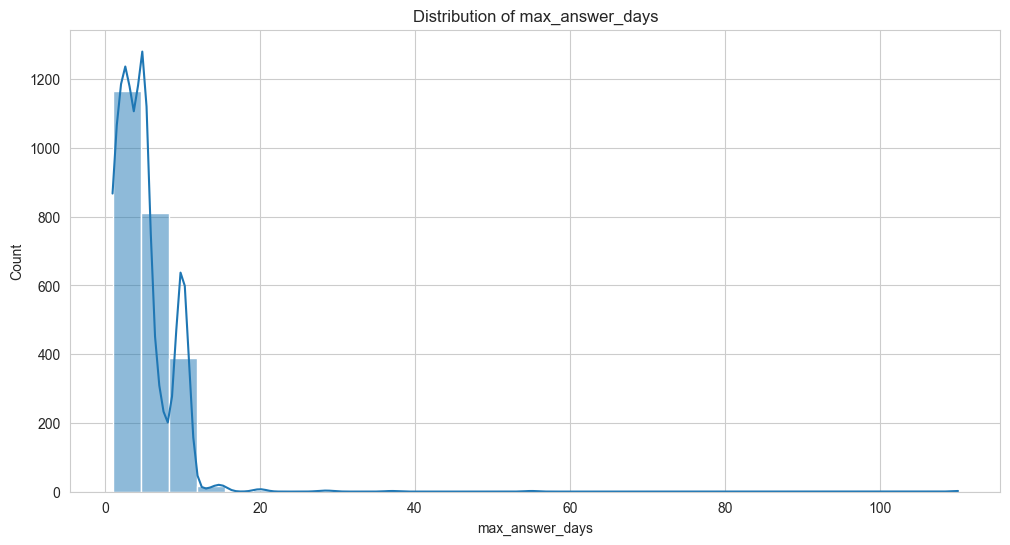

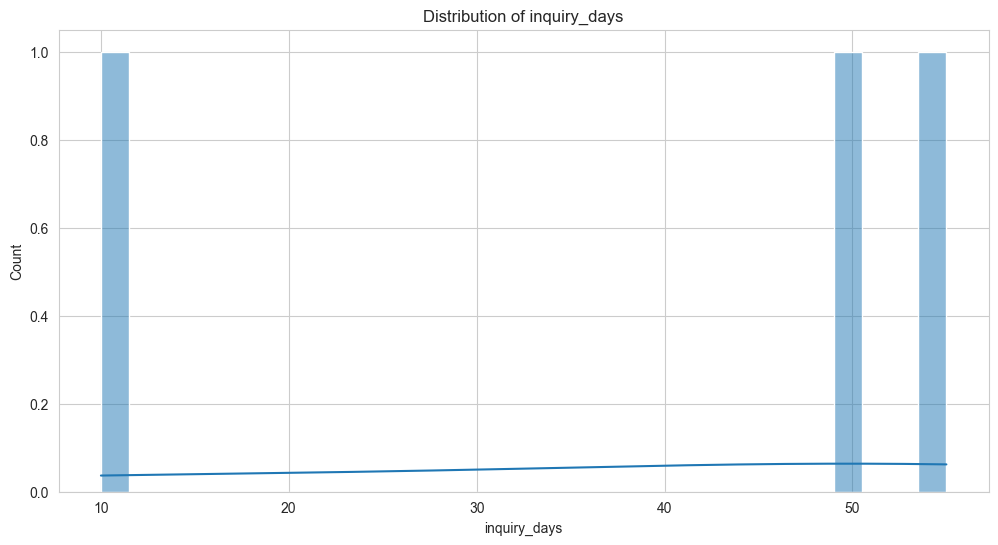

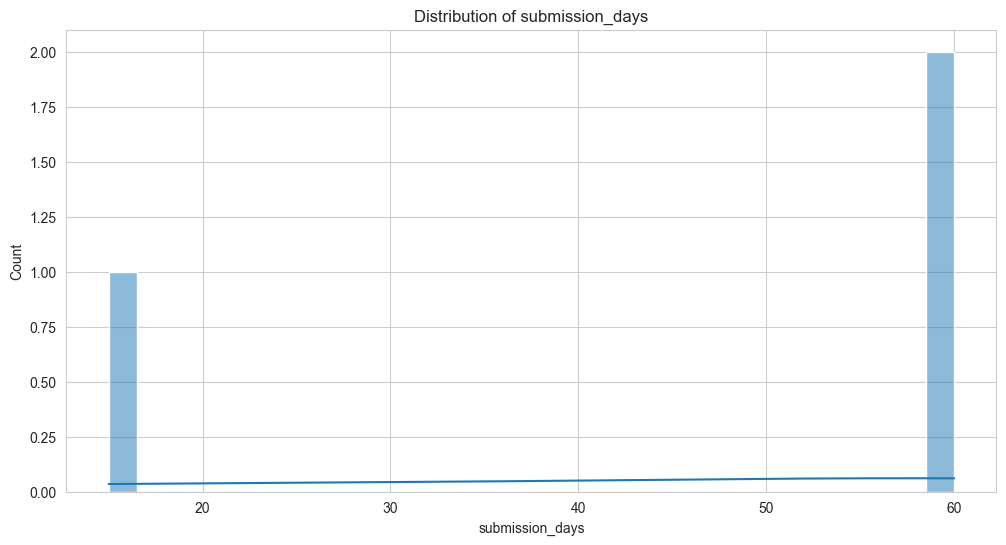

In [9]:
for col in num_cols:
    plt.figure()
    sns.histplot(df_tenders[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### 3.3 Categorical Columns Analysis

**Context:**  
Categorical analysis reveals **most common tender types, statuses, regions, and government entities**.  
This helps understand **data distribution for dashboard filtering and agent queries**.


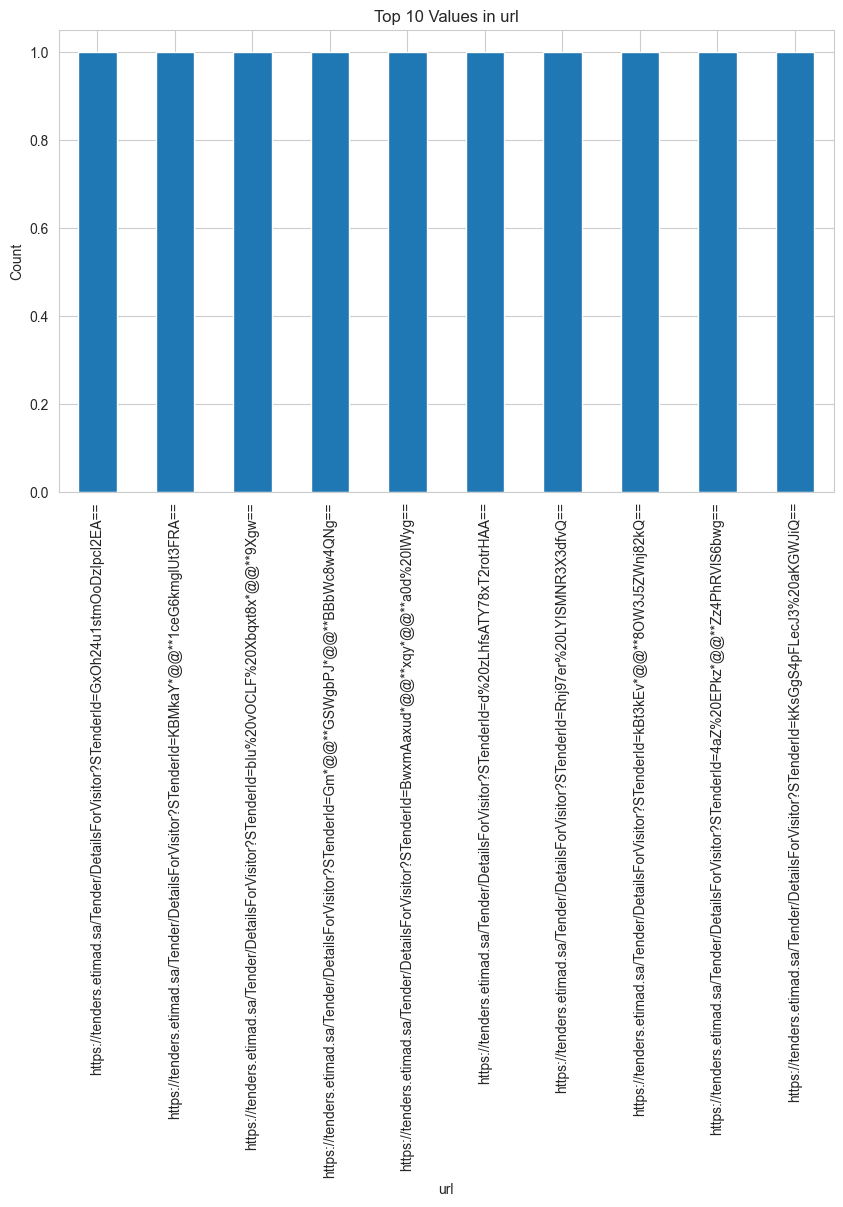

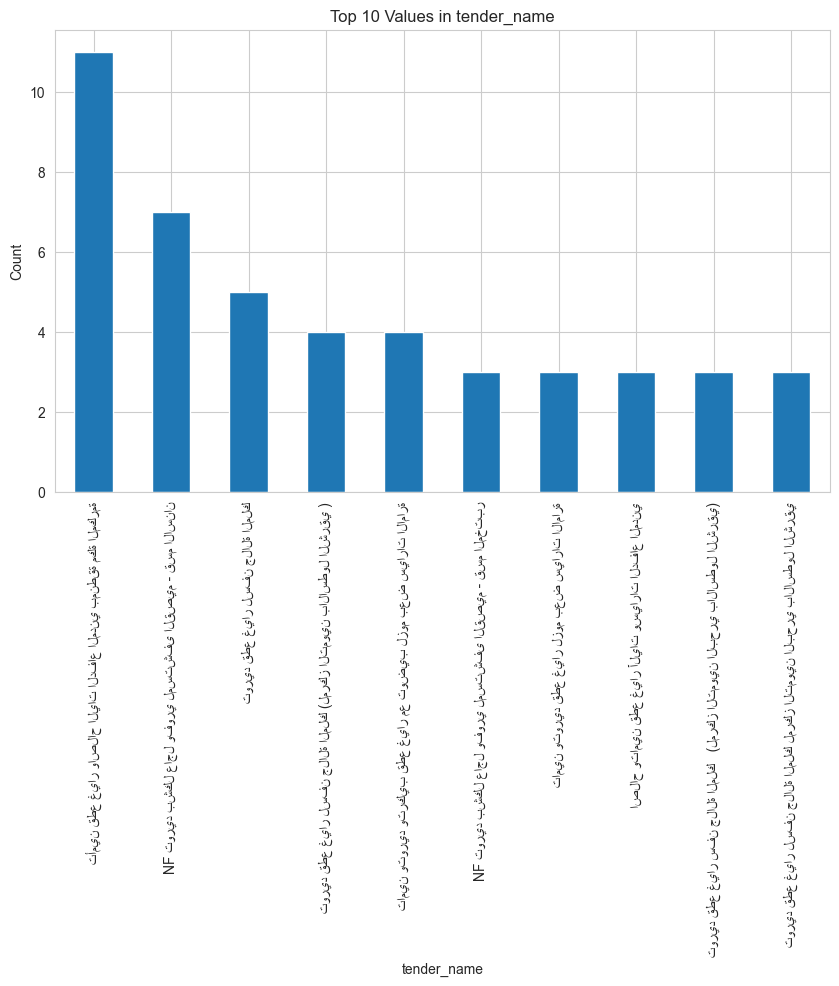

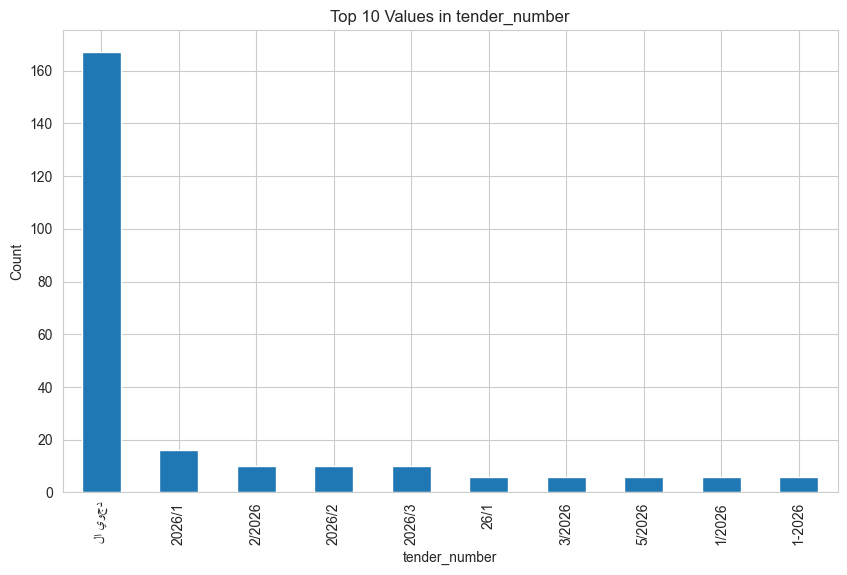

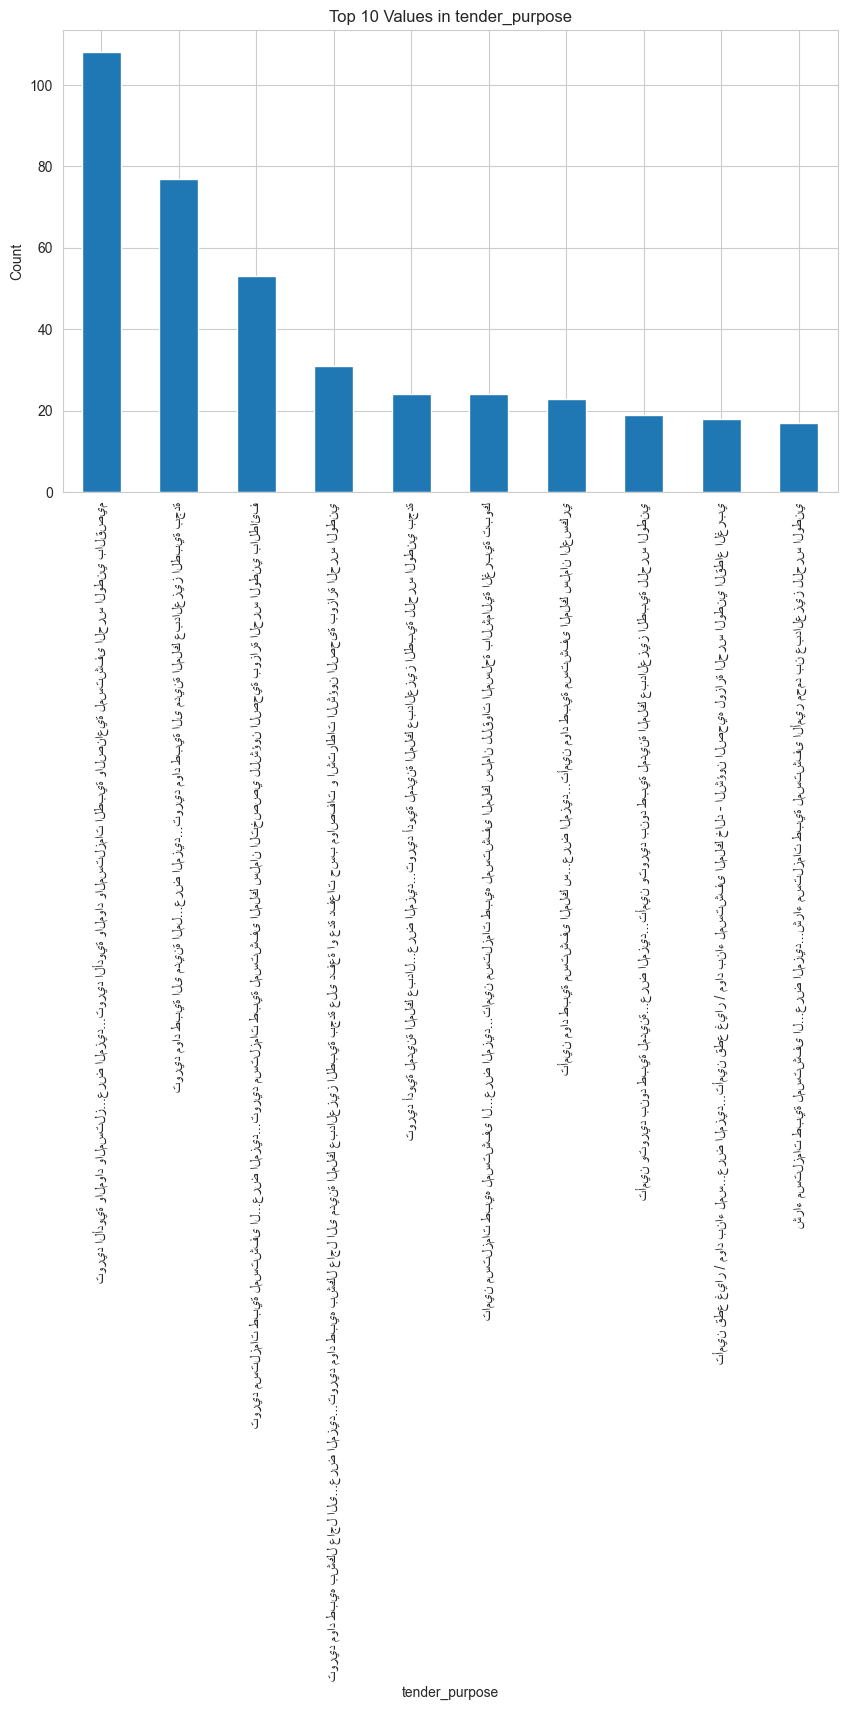

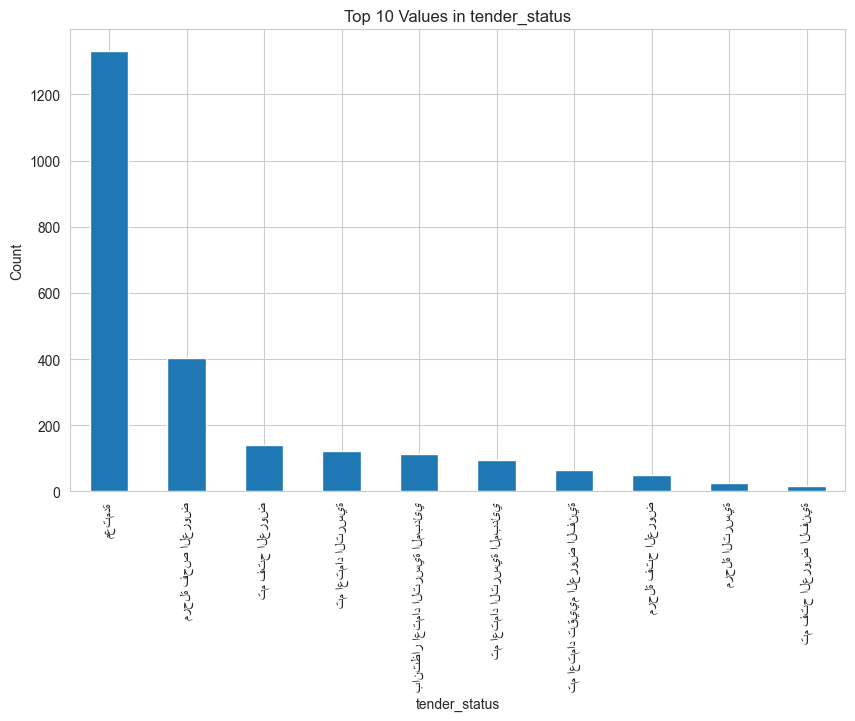

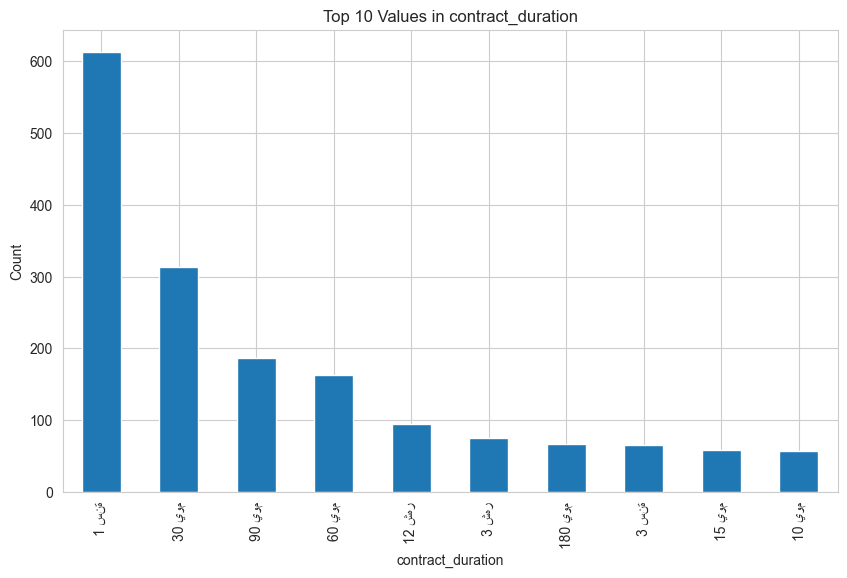

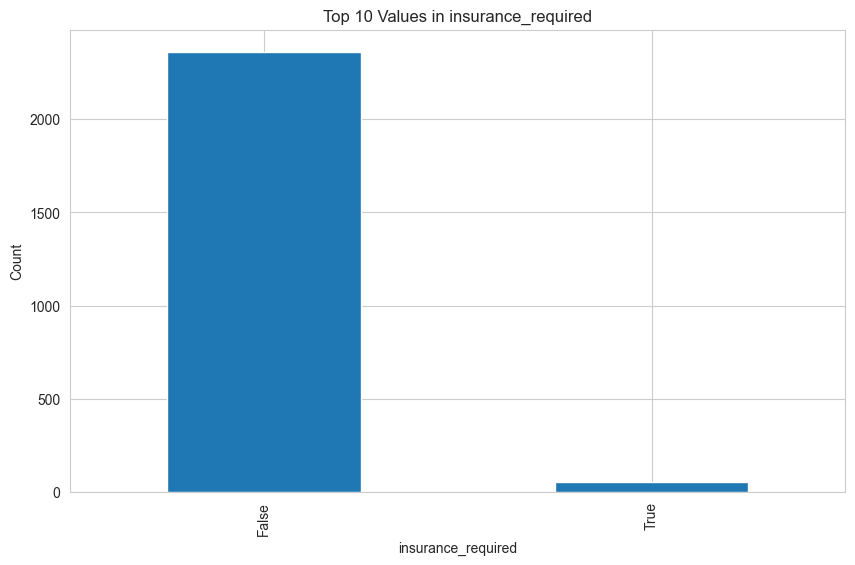

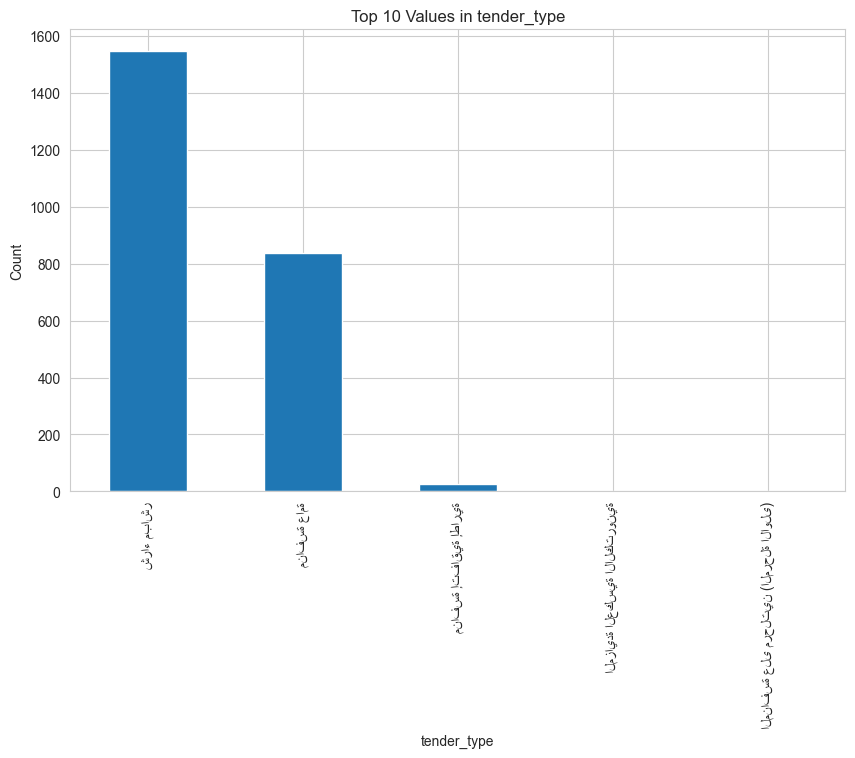

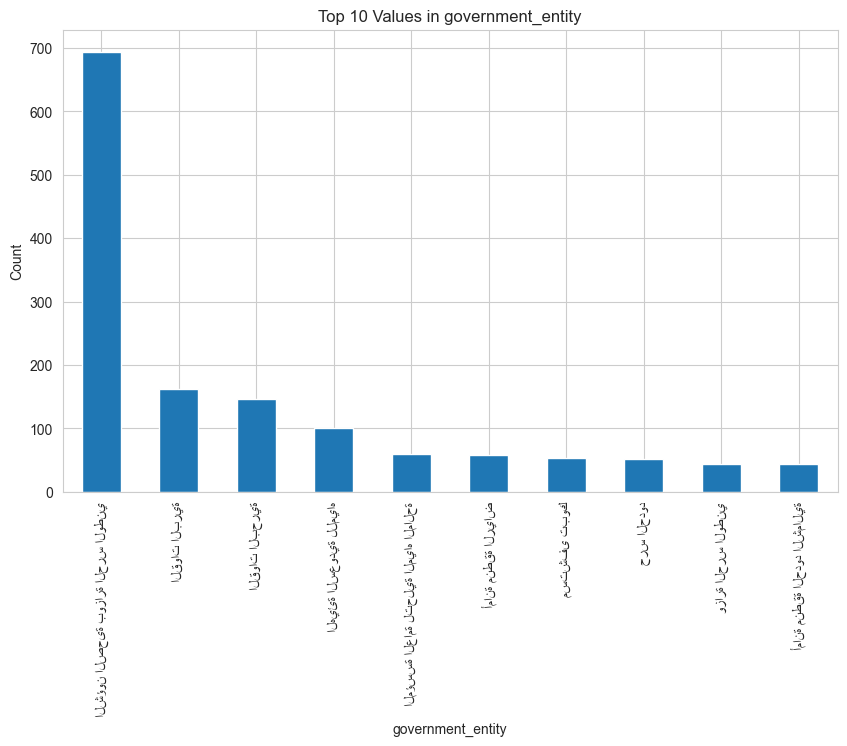

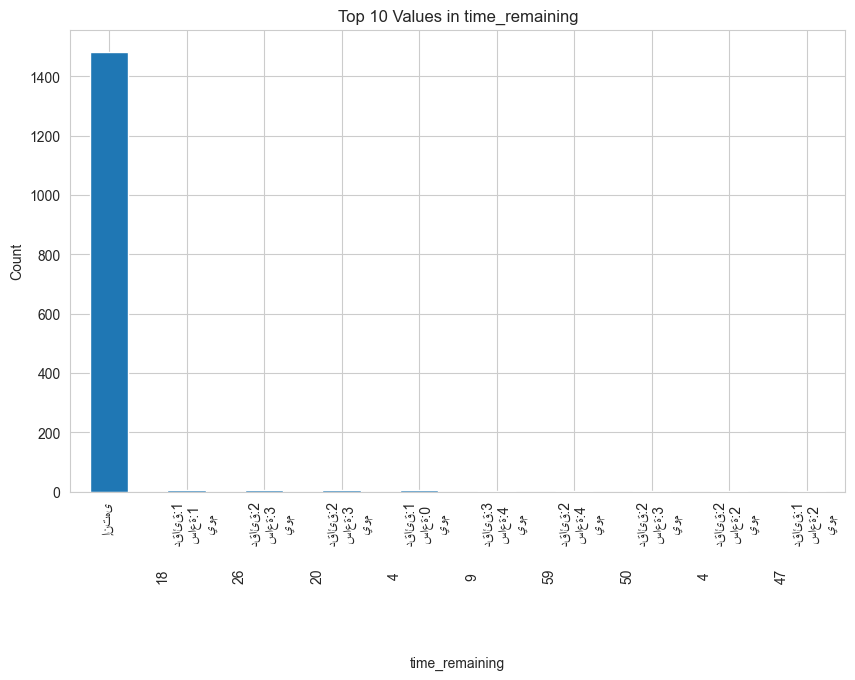

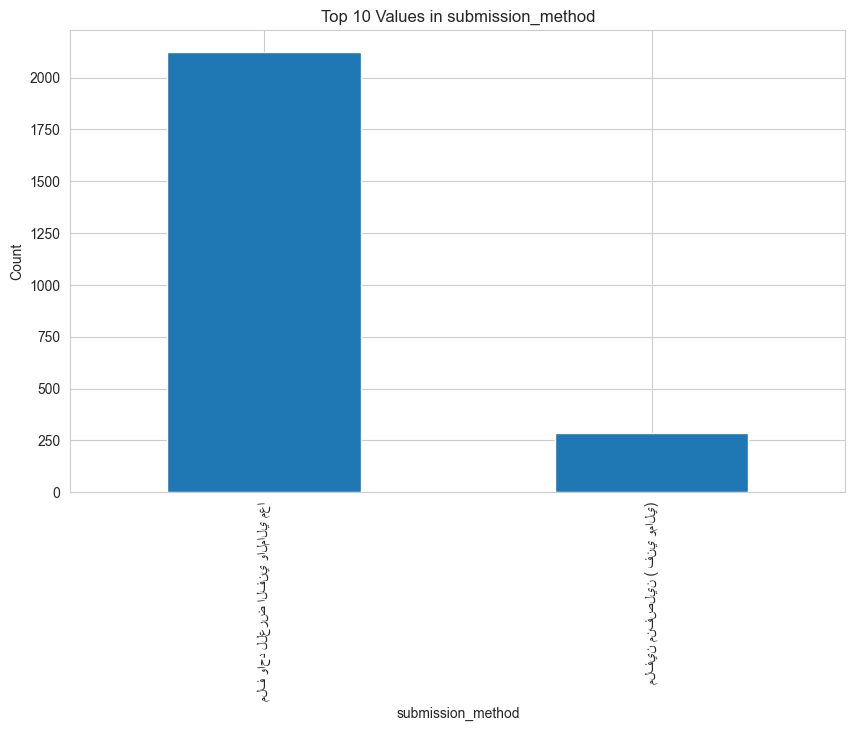

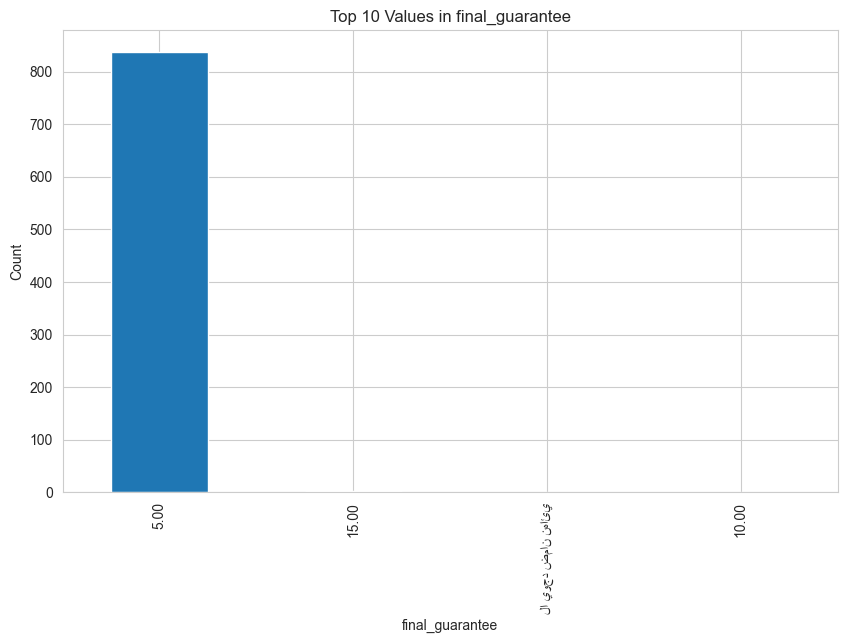

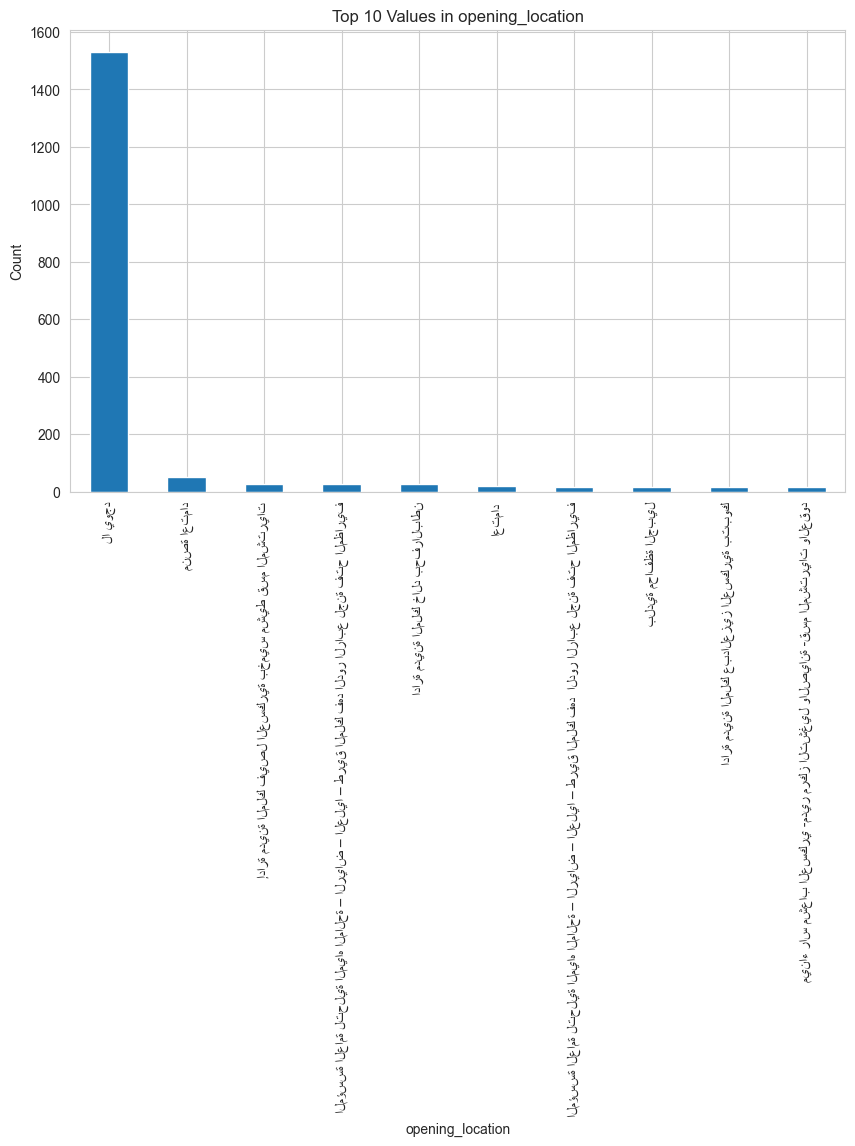

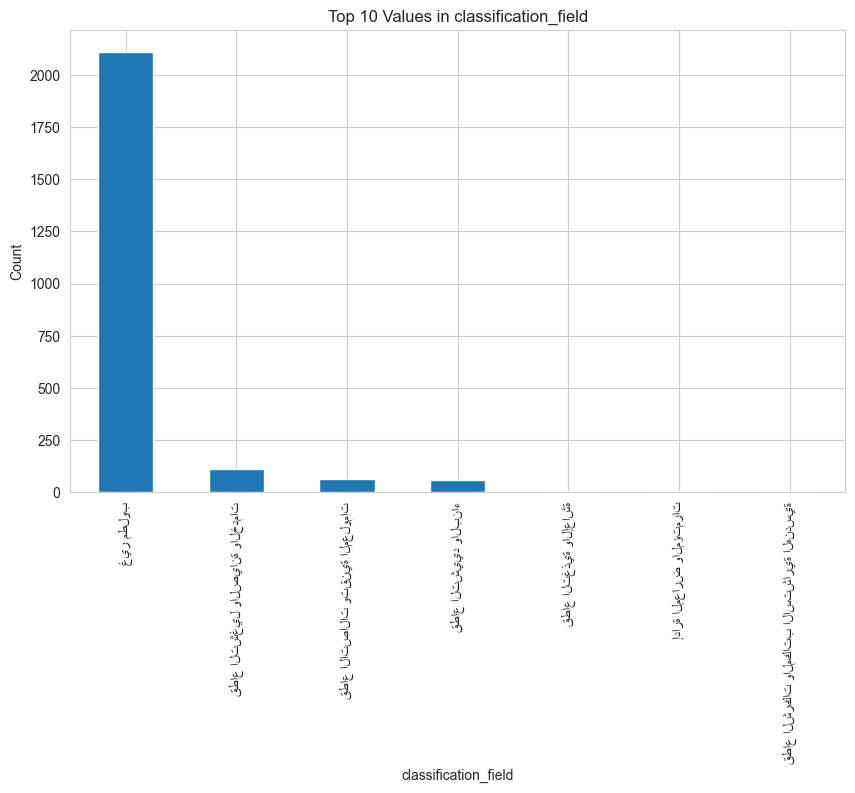

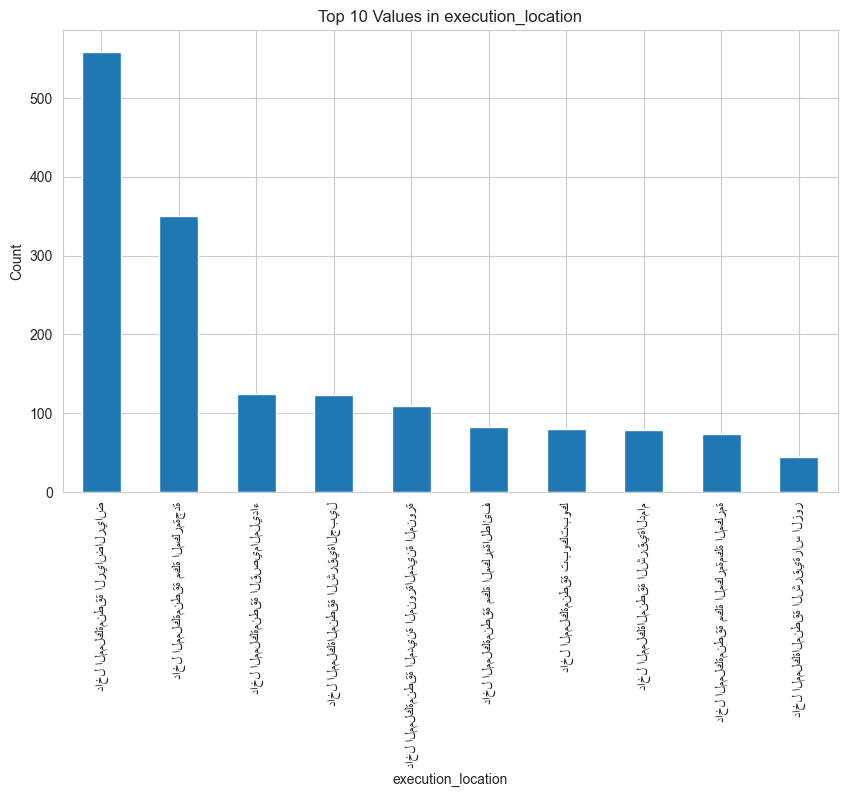

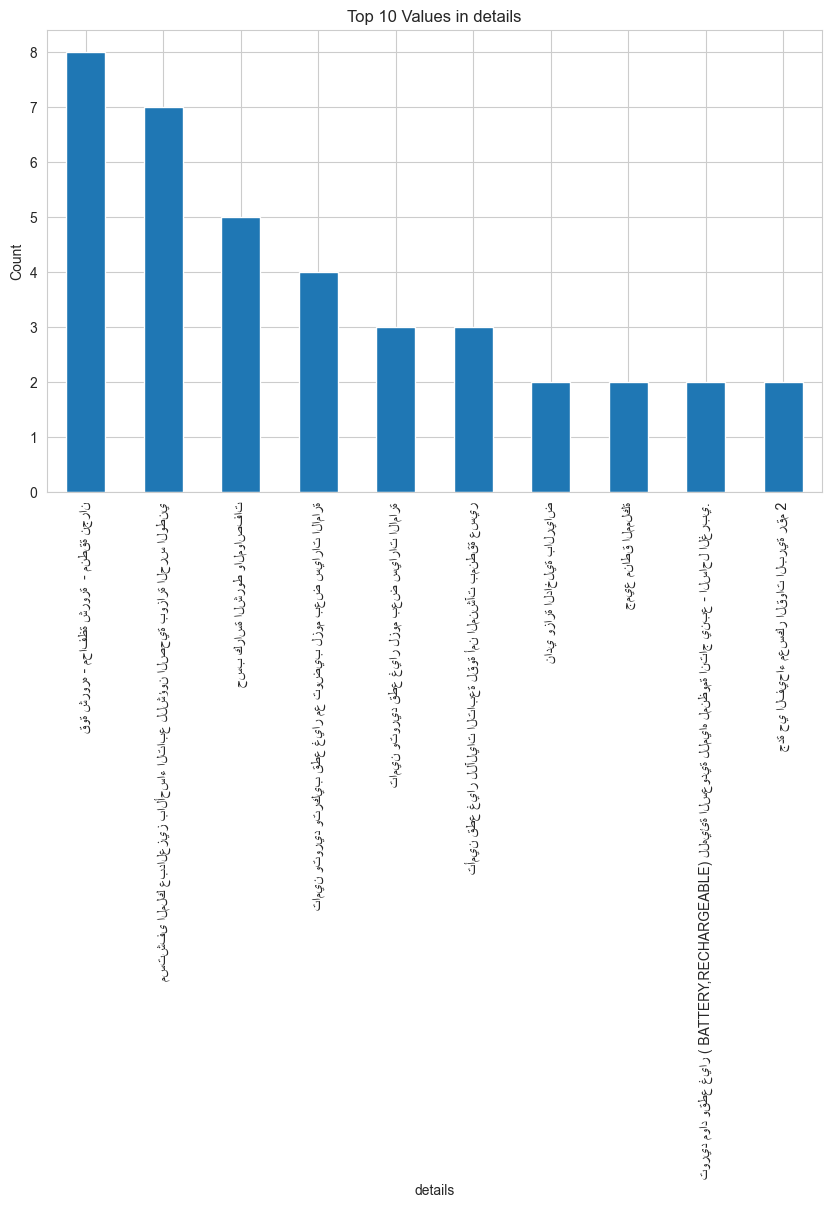

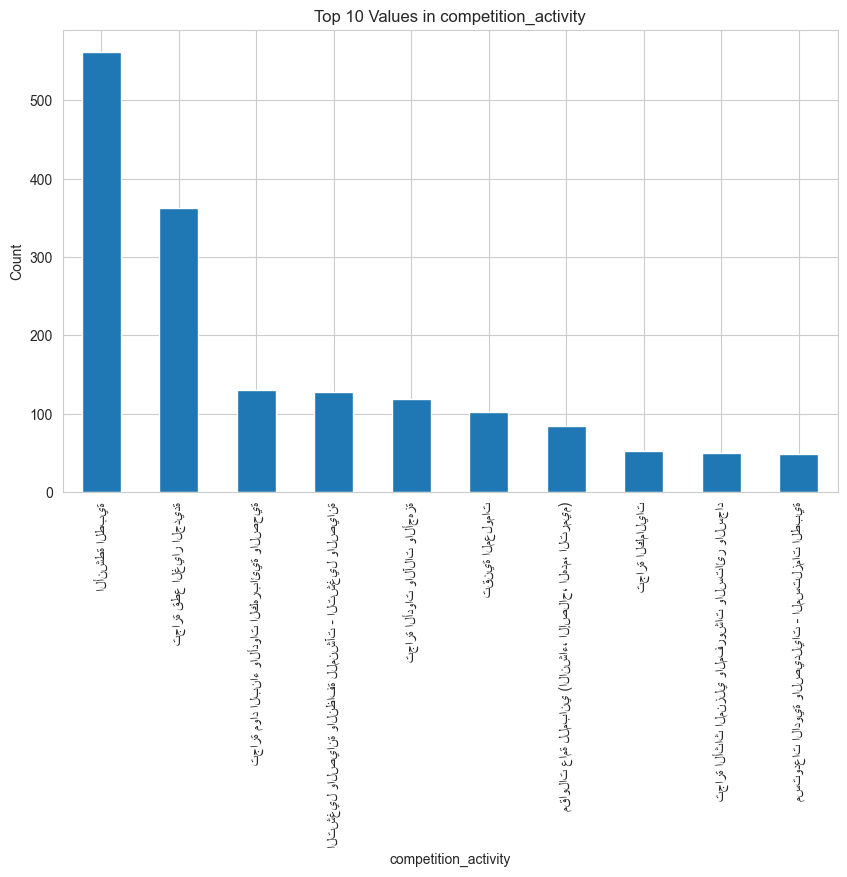

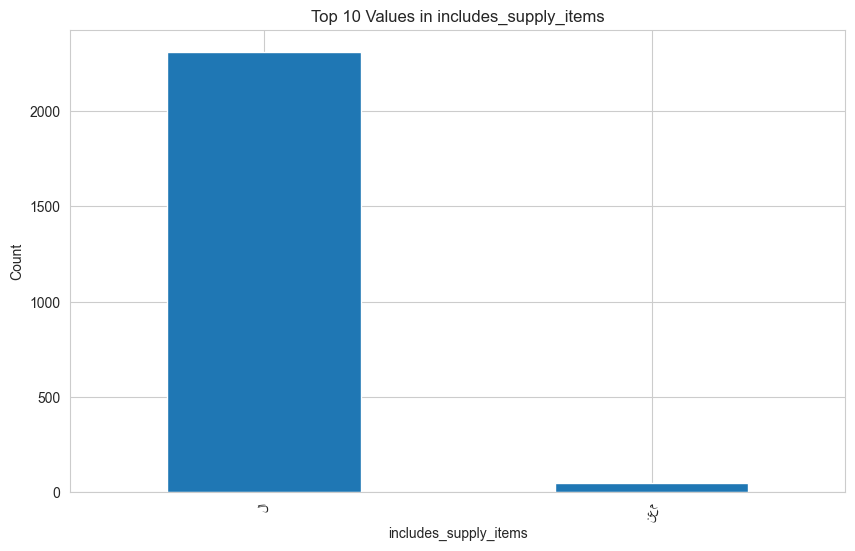

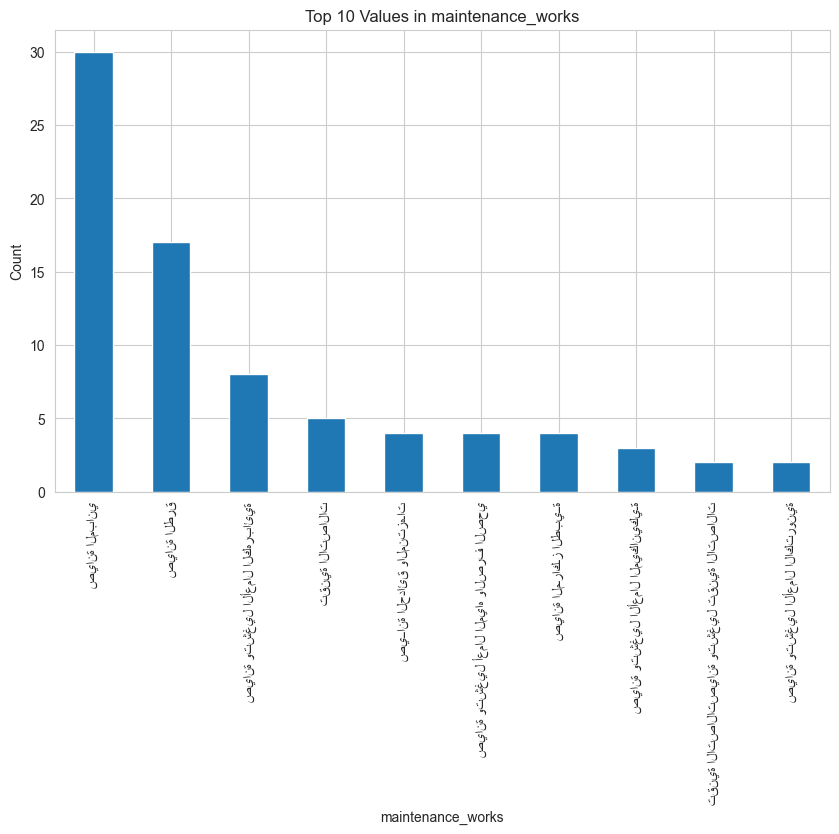

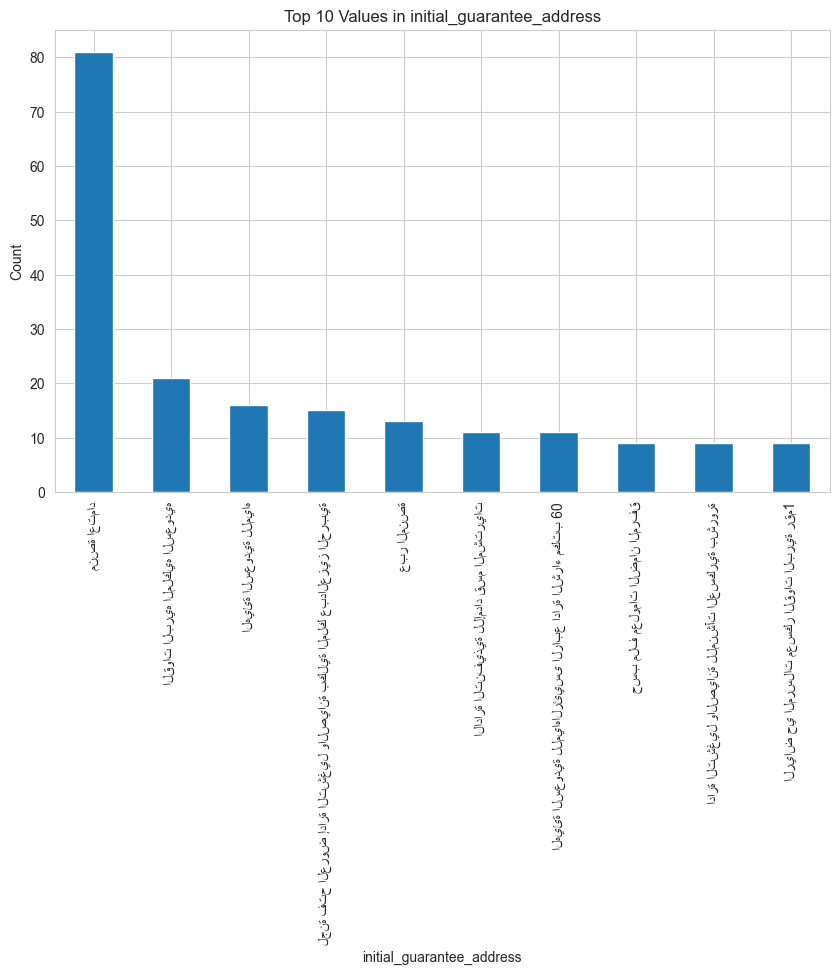

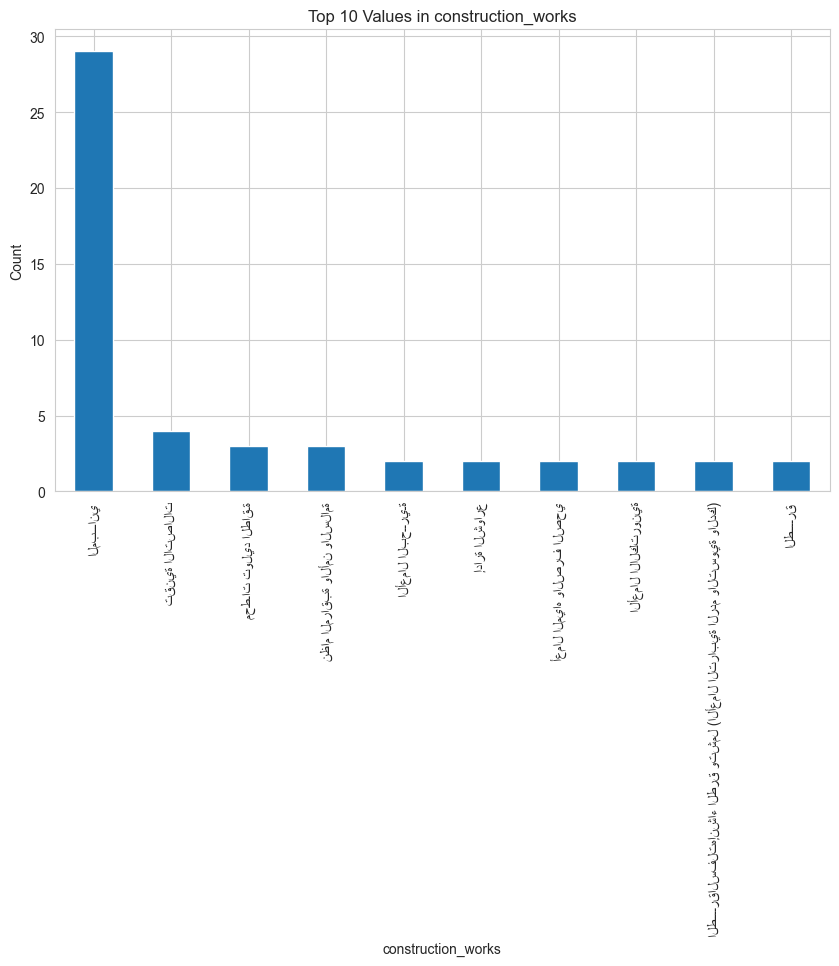

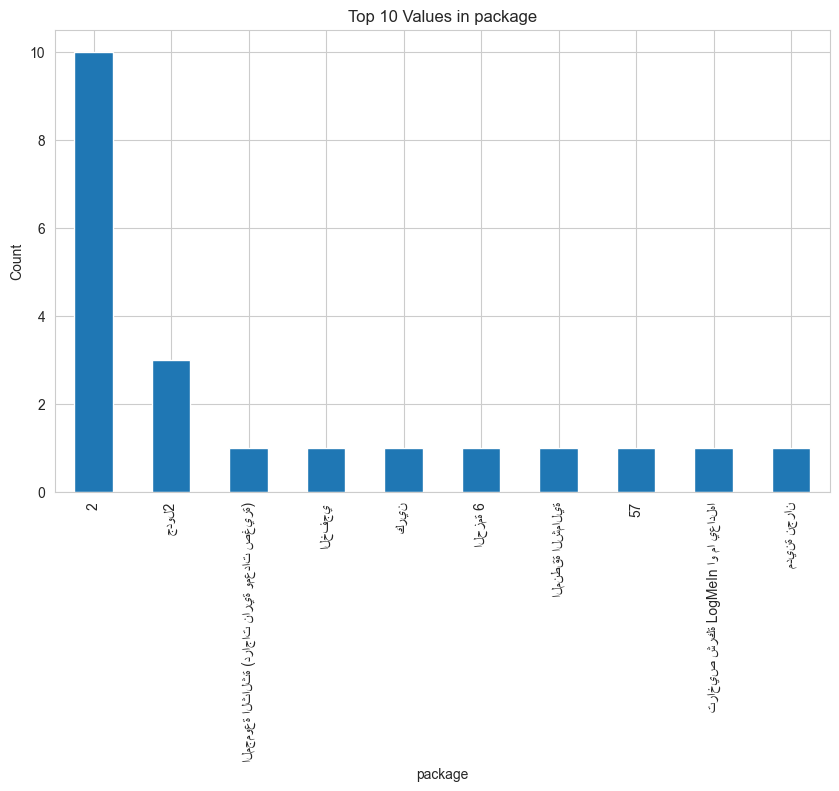

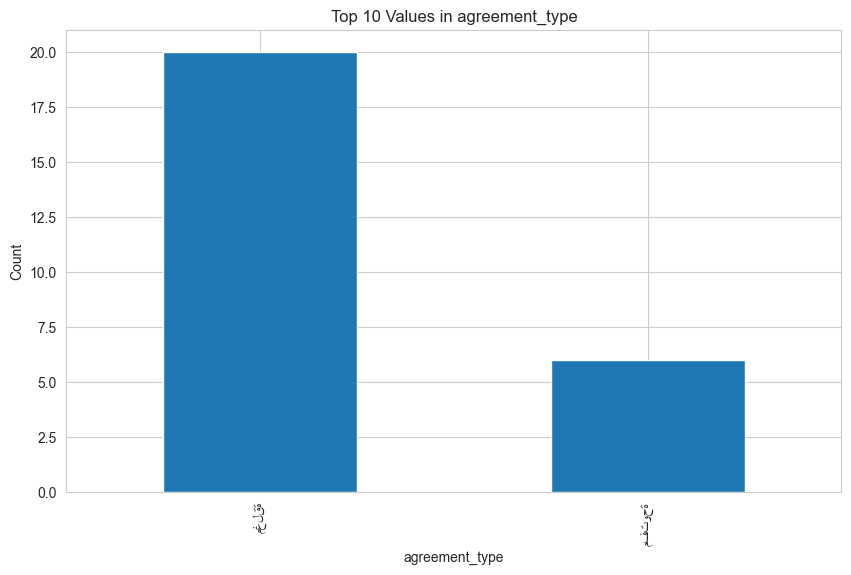

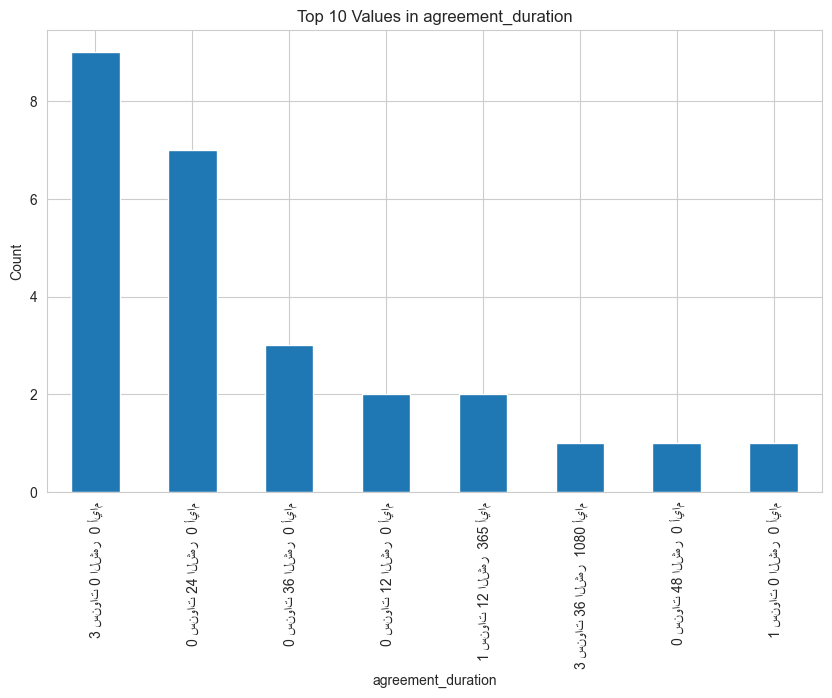

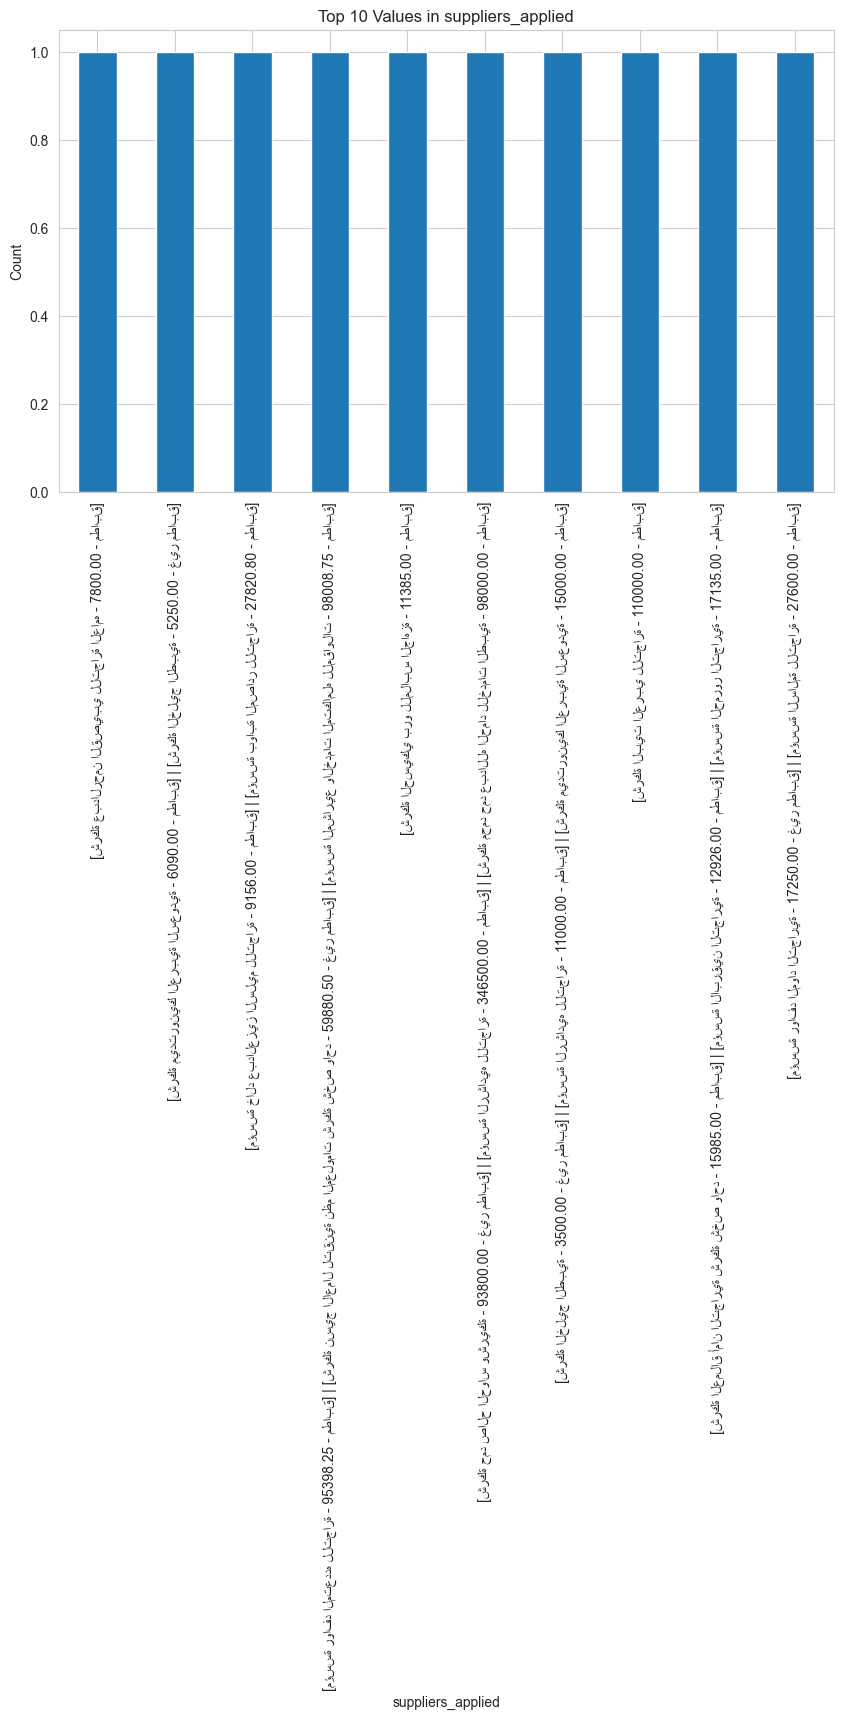

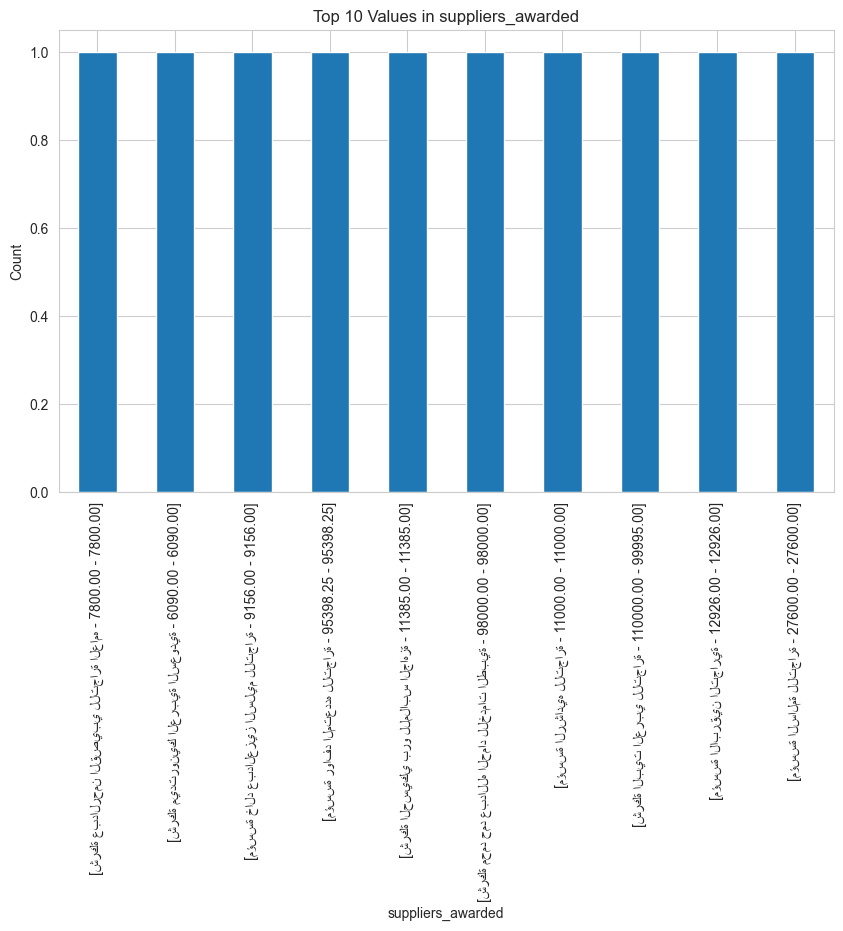

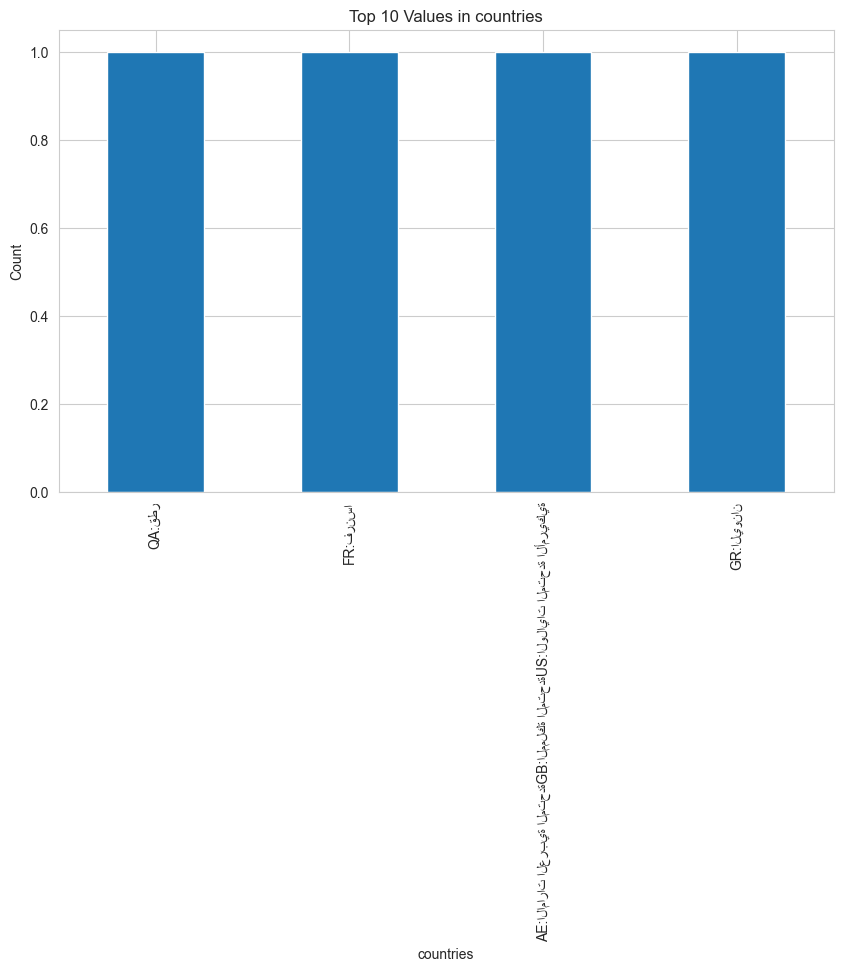

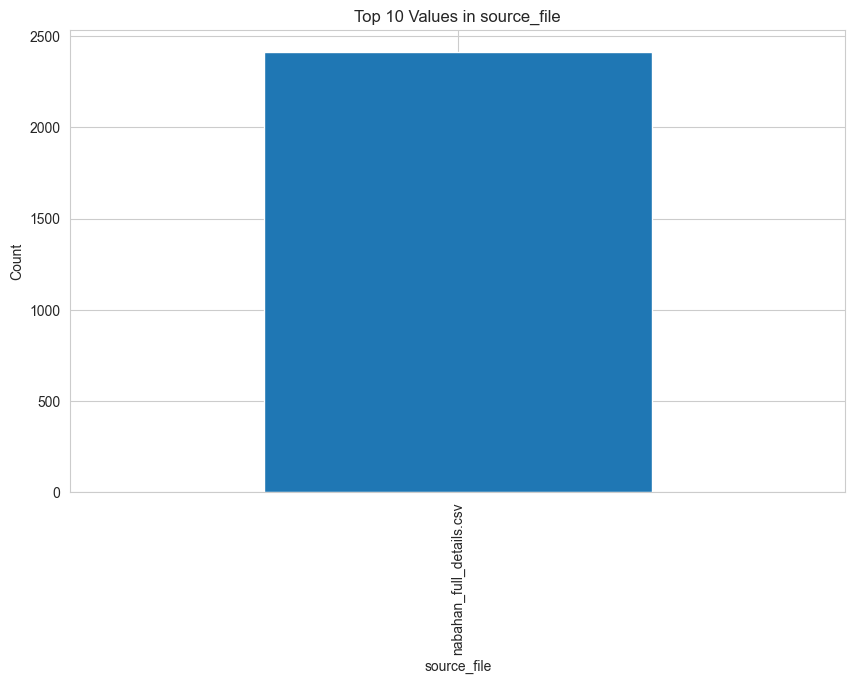

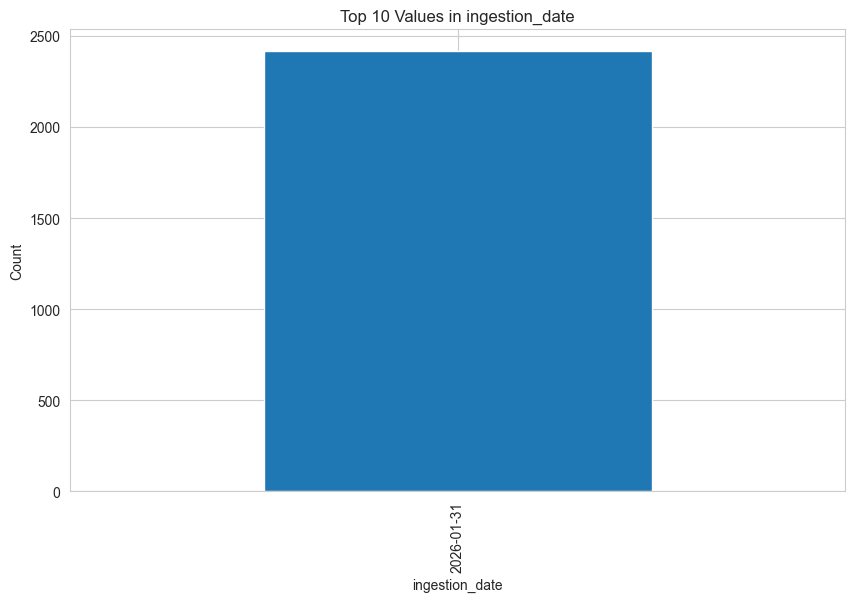

In [11]:
cat_cols = df_tenders.select_dtypes(include=['object']).columns.tolist()

# Count plots for top 10 frequent categories
for col in cat_cols:
    plt.figure(figsize=(10,6))
    df_tenders[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 Values in {col}')
    plt.ylabel("Count")
    plt.show()

### 3.4 Date Columns Analysis

**Context:**  
Date analysis allows us to **see trends over time**, like tender frequency by year or month.  
This is useful for **forecasting or analyzing market trends**.


In [14]:
print(df_tenders.columns)

Index(['url', 'tender_name', 'tender_number', 'reference_number',
       'tender_purpose', 'tender_document_value', 'tender_status',
       'contract_duration', 'insurance_required', 'tender_type',
       'government_entity', 'time_remaining', 'submission_method',
       'initial_guarantee_required', 'final_guarantee', 'inquiry_deadline',
       'submission_deadline', 'opening_date', 'evaluation_date',
       'suspension_period', 'expected_award_date', 'work_start_date',
       'question_start_date', 'max_answer_days', 'opening_location',
       'classification_field', 'execution_location', 'details',
       'competition_activity', 'includes_supply_items', 'maintenance_works',
       'initial_guarantee_address', 'construction_works', 'package',
       'agreement_type', 'agreement_duration', 'inquiry_days',
       'submission_days', 'suppliers_applied', 'suppliers_awarded',
       'countries', 'source_file', 'ingestion_date'],
      dtype='object')


In [12]:
date_cols = [c for c in df_tenders.columns if 'date' in c.lower() or 'تاريخ' in c.lower()]
df_tenders[date_cols].head()

,opening_date,evaluation_date,expected_award_date,work_start_date,question_start_date,ingestion_date
0,NaN,NaN,NaN,NaN,NaN,2026-01-31
1,NaN,NaN,NaN,NaN,NaN,2026-01-31
2,NaN,NaN,NaN,NaN,NaN,2026-01-31
3,NaN,NaN,NaN,NaN,NaN,2026-01-31
4,NaN,NaN,NaN,NaN,NaN,2026-01-31


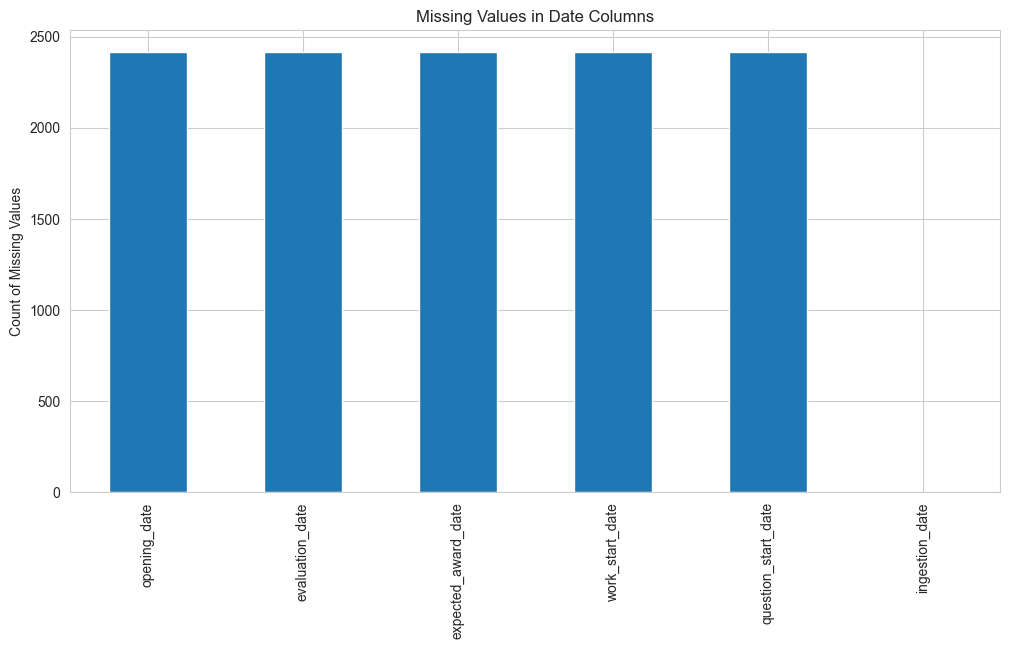

: 

In [ ]:
date_cols = ['opening_date', 'evaluation_date', 'expected_award_date', 'work_start_date', 'question_start_date', 'ingestion_date']

missing_counts = df_tenders[date_cols].isnull().sum()
missing_counts.plot(kind='bar')
plt.title("Missing Values in Date Columns")
plt.ylabel("Count of Missing Values")
plt.show()

### 3.5 Relationships / Correlations

**Context:**  
Correlation analysis helps identify **relationships between budget, duration, and number of bidders**.  
This can guide **feature selection** or highlight potential insights for strategic decisions.


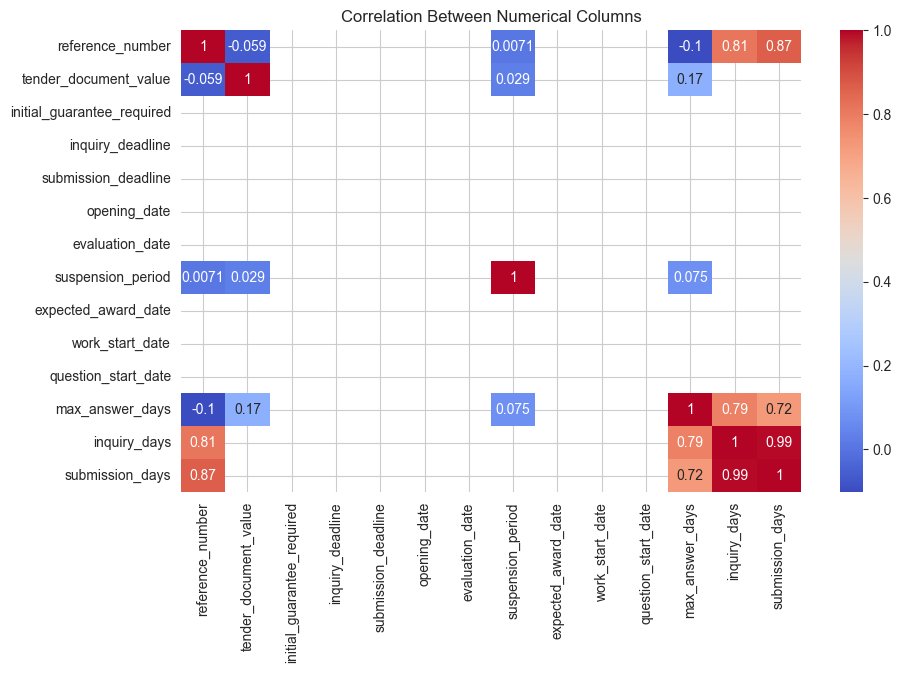

In [15]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(10,6))
sns.heatmap(df_tenders[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Columns")
plt.show()


# 4. Lookup Dataset EDA

**Context:**  
EDA on lookups ensures the **reference tables are valid**, **well distributed**, and **ready to merge** with core datasets.


### 4.1 Government Entities

**Context:**  
Lookup EDA helps us understand **how many unique categories exist** and sample values for **data validation**.


In [16]:
print(f"Total Government Entities: {df_ge.shape[0]}")
print("Sample entities:")
df_ge.head(10)

Total Government Entities: 1681
Sample entities:


,government_entity,source_file,ingestion_date
0,الديوان الملكي,Government Entity.csv,2026-01-31
1,المركز الوطني للوثائق والمحفوظات,Government Entity.csv,2026-01-31
2,الأمانة العامة لمجلس المحميات الملكية,Government Entity.csv,2026-01-31
3,مكتب شؤون المهمات والمبادرات,Government Entity.csv,2026-01-31
4,المجلس الاقتصادي الأعلى,Government Entity.csv,2026-01-31
5,مجلس الخدمة العسكرية,Government Entity.csv,2026-01-31
6,إدارة المتعاقدين,Government Entity.csv,2026-01-31
7,هيئة البيعة,Government Entity.csv,2026-01-31
8,المجلس الأعلى لشؤون البترول والمعادن,Government Entity.csv,2026-01-31
9,الشـؤون الخاصة لخادم الحرمين الشريفين,Government Entity.csv,2026-01-31


### 4.2 Activities

Primary Activities: ['التجارة' 'المقاولات' 'التشغيل والصيانة والنظافة للمنشآت'
 'العقارات والأراضي' 'الصناعة والتعدين والتدوير' 'الغاز والمياه والطاقة'
 'المناجم والبترول والمحاجر' 'الإعلام والنشر والتوزيع'
 'الاتصالات وتقنية المعلومات' 'الزراعة والصيد' 'الرعاية الصحية والنقاهة'
 'التعليم والتدريب' 'التوظيف والاستقدام' 'الأمن والسلامة'
 'النقل والبريد والتخزين' 'المهن الاستشارية'
 'السياحة والمطاعم والفنادق وتنظيم المعارض' 'المالية والتمويل والتأمين'
 'الخدمات الأخرى']


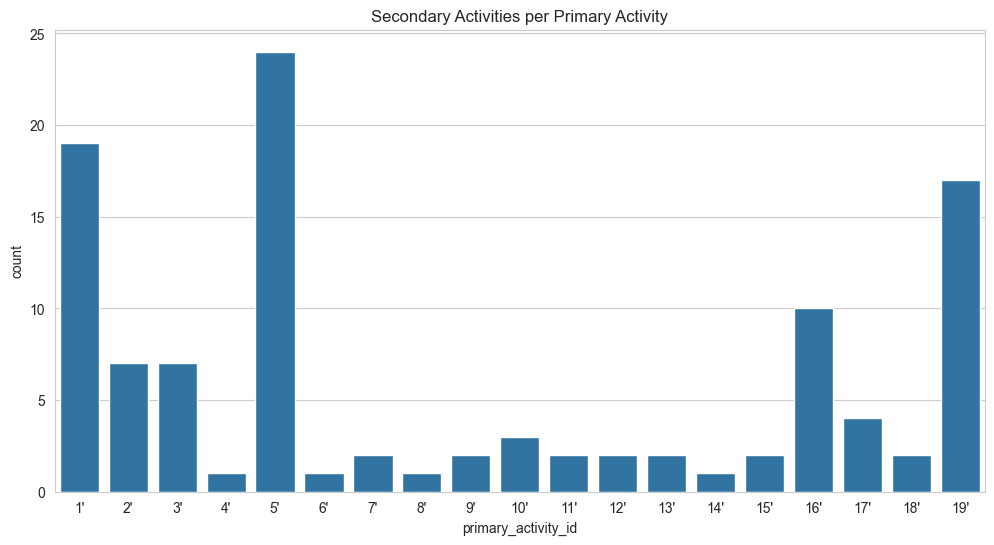

In [19]:
# Primary activities
print("Primary Activities:", df_pa['primary_activity'].unique())

# Secondary activities counts per primary
sns.countplot(data=df_sa, x='primary_activity_id')
plt.title("Secondary Activities per Primary Activity")
plt.show()


### 4.3 Tender Attributes

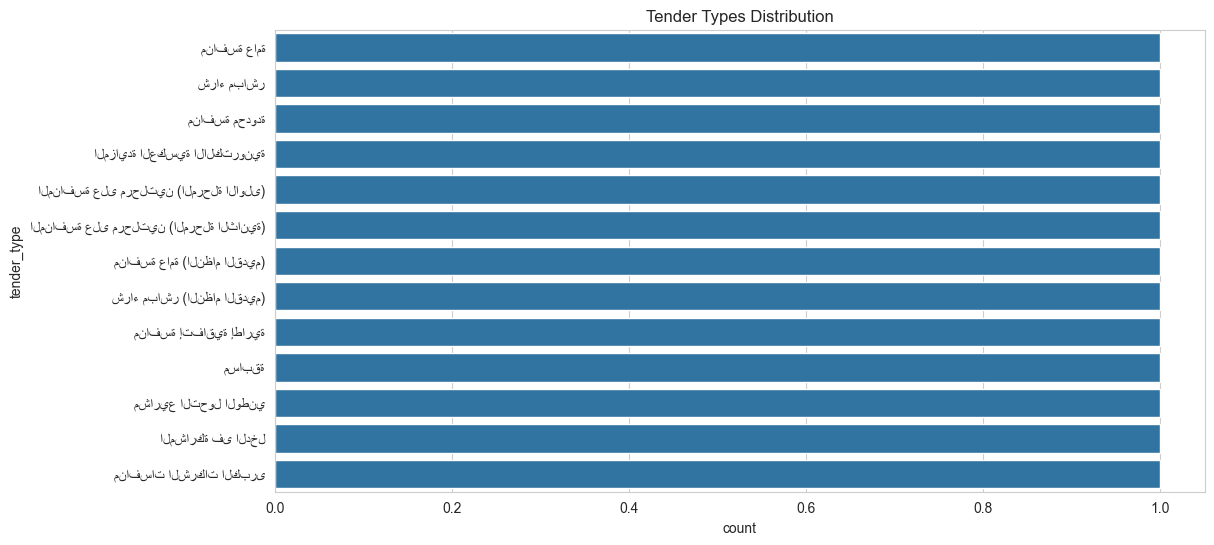

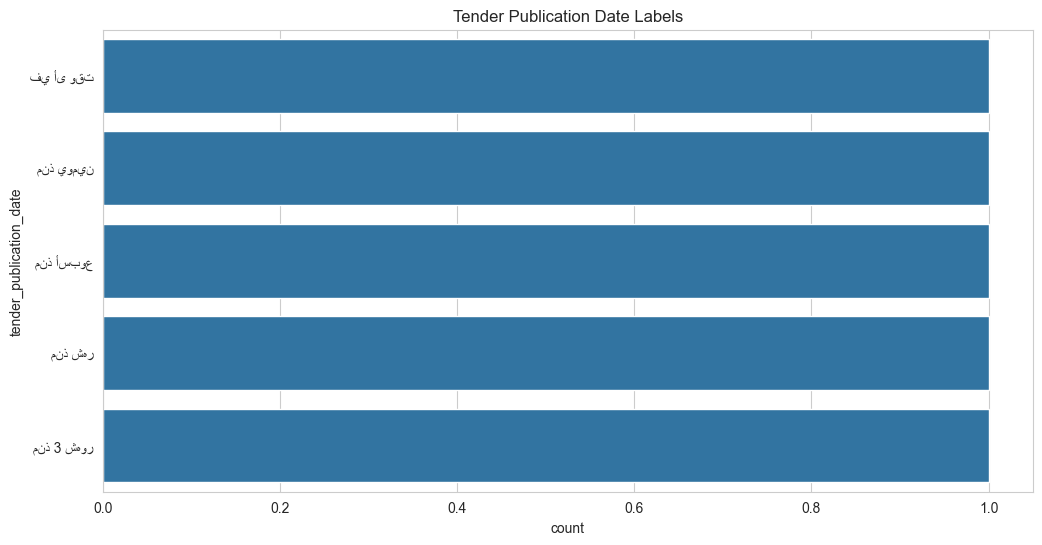

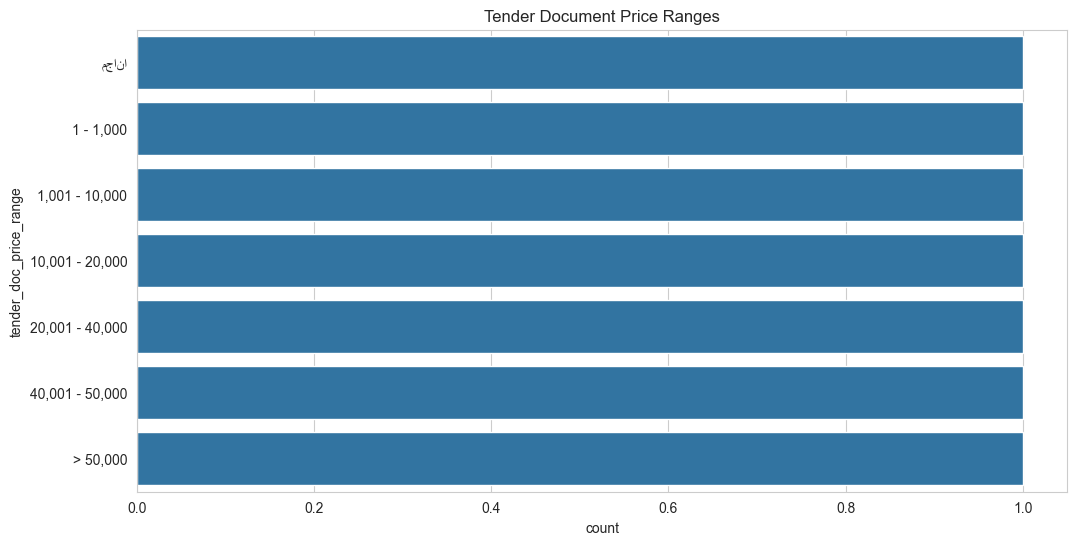

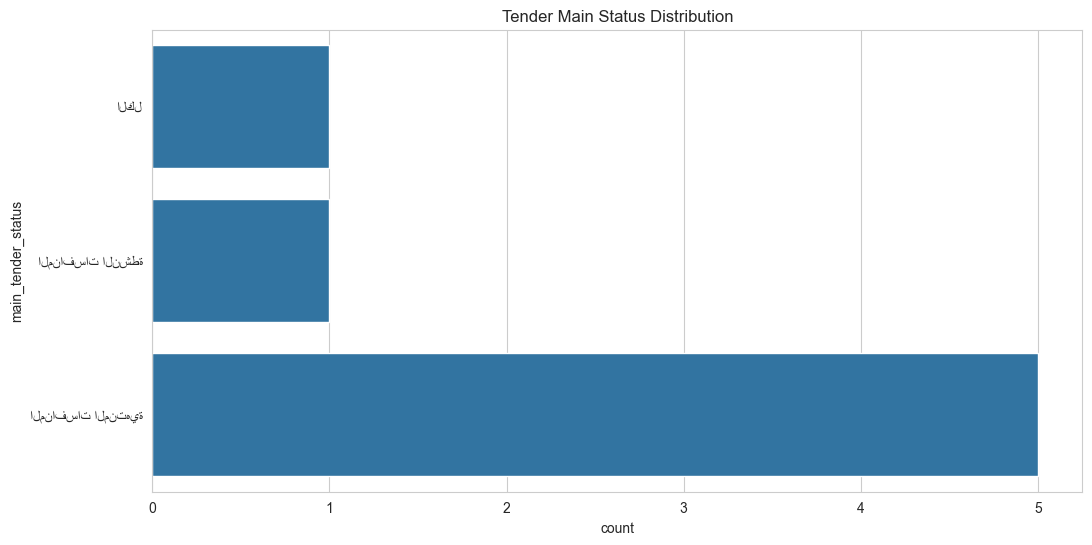

In [20]:
# Tender types
sns.countplot(y='tender_type', data=df_tt)
plt.title("Tender Types Distribution")
plt.show()

# Tender publication dates
sns.countplot(y='tender_publication_date', data=df_tpd)
plt.title("Tender Publication Date Labels")
plt.show()

# Tender price ranges
sns.countplot(y='tender_doc_price_range', data=df_tdpr)
plt.title("Tender Document Price Ranges")
plt.show()

# Tender statuses
sns.countplot(y='main_tender_status', data=df_ts)
plt.title("Tender Main Status Distribution")
plt.show()


# 6. Cross-tab analysis

**Context:**  
These advanced analyses **reveal hidden patterns**, support **dashboard metrics**, and help define **SQL queries for the agent**.


In [21]:
pivot = pd.pivot_table(df_tenders, values='tender_document_value', 
                       index='government_entity', columns='tender_type', 
                       aggfunc='count', fill_value=0)
pivot.head()

tender_type,المزايدة العكسية الالكترونية,المنافسة على مرحلتين (المرحلة الاولى),شراء مباشر,منافسة إتفاقية إطارية,منافسة عامة
government_entity,,,,,
أمارة منطقة الباحة,0,0,1,0,0
أمارة منطقة الجوف,0,0,1,0,2
أمارة منطقة الحدود الشمالية,0,0,0,0,1
أمارة منطقة الرياض,0,0,27,0,0
أمارة منطقة القصيم,0,0,0,0,2
